In [ ]:
import numpy as np
import pandas as pd

In [ ]:
sig_c = 19.035369774919616
sig_stat_ratio = 2.5148651991095727
sig_calc_ratio = 3.7558248825129854
sig_geo_ratio = 2.987088795448924

mu_c_stat = 22.716654237650783
mu_s_stat = 14.421693877104063
mu_c_calc = 42.404083255744844
mu_s_calc = 13.005682992823296
mu_c_geo = 24.836533353935422
mu_s_geo = 11.230151166287074
mu_c = 32.832618278418686

n_stat, n_calc, n_geo = 192230, 217380, 17015

In [ ]:
entire_stan = np.array([148,146,145,144,143,142,141,140,139,138,137,136,135,134,133,132,131,130,129,128,127,126,125,124,123,122,121,120,119,118,117,116,115,114,113,112,111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62])
entire_nums = np.array([612,86,517,800,16,325,2091,772,278,1338,4175,634,591,2969,2706,4239,2131,3829,7088,2489,4714,8431,2780,6068,9199,2998,7768,8792,3259,9384,7839,2690,11339,6641,2691,11454,5414,2287,6123,10289,3049,6460,8987,3555,7609,7102,5568,7771,5977,7060,6479,5539,5851,7559,5529,5575,6701,5060,4974,5307,5534,4808,5101,5316,5121,5034,5665,6409,6373,7475,7011,12946,9498,7229,7707,6255,5374,10577,3666,2882,2241,2667,556,976,223,423])

In [ ]:
def calculate_my_score(sig_stat_ratio, sig_calc_ratio, sig_geo_ratio, mu_c_stat, mu_s_stat, mu_c_calc, mu_s_calc, mu_c_geo, mu_s_geo, mu_c, sig_c,
                       my_com_score = int, my_sel_score = int, my_sel = ''):

    if my_sel == 'stat':
        my_score = round(14.8 / sig_c * my_com_score + 5.2 / sig_c * sig_stat_ratio * my_sel_score + 100 - 5.2 / sig_c * (sig_stat_ratio * mu_s_stat - mu_c_stat) - 20 * mu_c / sig_c)

    elif my_sel == 'calc':
        my_score = round(14.8 / sig_c * my_com_score + 5.2 / sig_c * sig_calc_ratio * my_sel_score + 100 - 5.2 / sig_c * (sig_calc_ratio * mu_s_calc - mu_c_calc) - 20 * mu_c / sig_c)

    elif my_sel == 'geo':
        my_score = round(14.8 / sig_c * my_com_score + 5.2 / sig_c * sig_geo_ratio * my_sel_score + 100 - 5.2 / sig_c * (sig_geo_ratio * mu_s_geo - mu_c_geo) - 20 * mu_c / sig_c)

    return my_score

In [ ]:
score_pairs = []

for com_score in [74] + list(range(72,1,-1)) + [0]:
    for sel_score in [26] + list(range(24,1,-1)) + [0]:
        score_pairs.append((com_score,sel_score))

score_pairs = np.array(score_pairs)

In [ ]:
stan_scores_stat = []
stan_scores_calc = []
stan_scores_geo = []

indices = [stan_scores_stat, stan_scores_calc, stan_scores_geo]

# 1825개 모두 각자가 해당하는 표준점수가 있다

selections = ['stat', 'calc', 'geo']

for i, sel in enumerate(selections):
    for com_score, sel_score in score_pairs:
        indices[i].append(calculate_my_score(sig_stat_ratio, sig_calc_ratio, sig_geo_ratio, mu_c_stat, mu_s_stat, mu_c_calc, mu_s_calc, mu_c_geo, mu_s_geo, mu_c, sig_c, my_com_score=com_score, my_sel_score=sel_score, my_sel = sel))

stan_scores_stat = np.array(stan_scores_stat)
stan_scores_calc = np.array(stan_scores_calc)
stan_scores_geo = np.array(stan_scores_geo)

In [ ]:
z_scores = {}

for pair, num in zip(score_pairs, stan_scores_stat):
    z_scores[('stat', tuple(pair))] = int(num)

for pair, num in zip(score_pairs, stan_scores_calc):
    z_scores[('calc', tuple(pair))] = int(num)

for pair, num in zip(score_pairs, stan_scores_geo):
    z_scores[('geo', tuple(pair))] = int(num)

from pprint import pprint

repr(z_scores)

"{('stat', (74, 26)): 137, ('stat', (74, 24)): 136, ('stat', (74, 23)): 135, ('stat', (74, 22)): 134, ('stat', (74, 21)): 134, ('stat', (74, 20)): 133, ('stat', (74, 19)): 132, ('stat', (74, 18)): 132, ('stat', (74, 17)): 131, ('stat', (74, 16)): 130, ('stat', (74, 15)): 130, ('stat', (74, 14)): 129, ('stat', (74, 13)): 128, ('stat', (74, 12)): 128, ('stat', (74, 11)): 127, ('stat', (74, 10)): 126, ('stat', (74, 9)): 126, ('stat', (74, 8)): 125, ('stat', (74, 7)): 124, ('stat', (74, 6)): 123, ('stat', (74, 5)): 123, ('stat', (74, 4)): 122, ('stat', (74, 3)): 121, ('stat', (74, 2)): 121, ('stat', (74, 0)): 119, ('stat', (72, 26)): 136, ('stat', (72, 24)): 134, ('stat', (72, 23)): 134, ('stat', (72, 22)): 133, ('stat', (72, 21)): 132, ('stat', (72, 20)): 132, ('stat', (72, 19)): 131, ('stat', (72, 18)): 130, ('stat', (72, 17)): 129, ('stat', (72, 16)): 129, ('stat', (72, 15)): 128, ('stat', (72, 14)): 127, ('stat', (72, 13)): 127, ('stat', (72, 12)): 126, ('stat', (72, 11)): 125, ('stat'

In [ ]:
# Define the score pairs and their indices

z_group_totals = {}

for stan, num in zip(entire_stan, entire_nums):
    z_group_totals[int(stan)] = int(num)

len(z_group_totals)

86

# A_eq, b_eq 선형 방정식 생성

In [ ]:
n_stat = 192230 # n_stat
n_calc = 217380 # n_calc
n_geo = 17015 # n_geo

totals = {'stat': n_stat, 'calc': n_calc, 'geo': n_geo}

epsilon = 0

# RL 용 가중치들이다
# 표준점수별 도수를 우선시 하면서도, mu와 sig등이 무시 당하지 않게 해야한다
#디폴트의 경우 어느정도 mu는 유사했다

weight_zscore_num = 10

weight_mu_c = 1
weight_mu_s = 1
weight_sel_tot = 1
weight_sig_c = 1
weight_sig_ratio = 1


num_pairs = len(score_pairs)
score_pairs = [tuple(pair) for pair in score_pairs]

# Mean constraints
mean_first_element = {'stat': mu_c_stat, 'calc': mu_c_calc, 'geo': mu_c_geo}
mean_second_element = {'stat': mu_s_stat, 'calc': mu_s_calc, 'geo': mu_s_geo}


# sig ratio constraints
sig_ratio_element = {'stat': sig_stat_ratio, 'calc': sig_calc_ratio, 'geo': sig_geo_ratio}


# Create the coefficient matrix for equality constraints
num_variables = num_pairs * 3
A_eq = []
b_eq = []


# Z점수 도수 제약
for k, total in sorted(z_group_totals.items(), reverse=True):
    row = []
    for student_type in ['stat', 'calc', 'geo']:
        for pair in score_pairs:
            row.append(1 * weight_zscore_num if z_scores[(student_type, pair)] == k else 0)
    A_eq.append(row)
    b_eq.append(total * weight_zscore_num)


# mu_c_sel 선택별 공통과목 평균 제약
for student_type in ['stat', 'calc', 'geo']:

    # 5475개 A,B,C 순
    row = [0] * num_variables

    # A,B,C 각각 1825개 씩 보게 된다
    for i, (s1, s2) in enumerate(score_pairs):
        if student_type == 'stat':
            row[i] = s1 * weight_mu_c
        elif student_type == 'calc':
            row[i + 1825] = s1 * weight_mu_c
        else:
            row[i + 3650] = s1 * weight_mu_c

    A_eq.append(row)
    # 평균으로 직접 설정하는 것이 나은가? sumprod로 하면 오차가 커질 것이다
    b_eq.append(mean_first_element[student_type] * totals[student_type] * weight_mu_c)


# mu_s_sel 선택별 선택과목 평균제약
for student_type in ['stat', 'calc', 'geo']:

    # num_variables 5475개
    row = [0] * num_variables
    for i, (s1, s2) in enumerate(score_pairs):
        if student_type == 'stat':
            row[i] = s2 * weight_mu_s
        elif student_type == 'calc':
            row[i + 1825] = s2 * weight_mu_s
        else:
            row[i + 3650] = s2 * weight_mu_s

    A_eq.append(row)
    b_eq.append(mean_second_element[student_type] * totals[student_type] * weight_mu_s)


# sig_c
row = [0] * num_variables

for i, (s1, s2) in enumerate(score_pairs):
    for j in range(3):
        # (공통 원점수 - 공통 원점수 평균)**2
        row[i + j*1825] = (s1-mu_c)**2 * weight_sig_c

A_eq.append(row)
b_eq.append(sig_c**2 * (n_stat + n_calc + n_geo) * weight_sig_c)



# sig_stat_ratio, sig_calc_ratio, sig_geo_ratio
for student_type in ['stat', 'calc', 'geo']:
    row = [0] * num_variables

    for i, (s1, s2) in enumerate(score_pairs):
        # (공통 원점수 - 공통 원점수 평균)**2 - 표준비율**2 * (선택 원점수 - 선택 원점수 평균)**2
        if student_type == 'stat':
            row[i] = ((s1-mean_first_element[student_type])**2 - sig_ratio_element[student_type]**2 * (s2-mean_second_element[student_type])**2) * weight_sig_ratio
        elif student_type == 'calc':
            row[i + 1825] = ((s1-mean_first_element[student_type])**2 - sig_ratio_element[student_type]**2 * (s2-mean_second_element[student_type])**2) * weight_sig_ratio
        else:
            row[i + 3650] = ((s1-mean_first_element[student_type])**2 - sig_ratio_element[student_type]**2 * (s2-mean_second_element[student_type])**2) * weight_sig_ratio

    A_eq.append(row)
    b_eq.append(0)


# 선택과목별 total 제약식
# 나누면 다 동일한 숫자로 나온다
# 전체 도수 개념도 포함되어있어서, redundant한게 하나는 생길 수 밖에 없다
# C 를 지워보자
# C 를 지우니 redundant는 없어졌다
# 평균합에서 이미 고려되기 때문에 전체가 종속적이다?

for student_type in ['stat', 'calc']:

    # 0이 5475개
    row = [0] * num_variables
    for i, (s1, s2) in enumerate(score_pairs):
        if student_type == 'stat':
            row[i] = 1 * weight_sel_tot
        else:
            row[i + 1825] = 1 * weight_sel_tot

    A_eq.append(row)
    b_eq.append(totals[student_type] * weight_sel_tot)


# 3개 다 사용하는 경우, redundant 발생한다
# for student_type in ['stat', 'calc', 'geo']:

#     # num_variables 5475개
#     row = [0] * num_variables
#     for i, (s1, s2) in enumerate(score_pairs):
#         if student_type == 'stat':
#             row[i] = 1 / 10
#         elif student_type == 'calc':
#             row[i + 1825] = 1 / 10
#         else:
#             row[i + 3650] = 1 / 10

#     A_eq.append(row)
#     b_eq.append(totals[student_type] / 10)






# Convert A_eq and b_eq to numpy arrays
A_eq = np.array(A_eq)
b_eq = np.array(b_eq)


np.set_printoptions(threshold=np.inf)
# Print A_eq and b_eq for debugging
print("A_eq:")
print(A_eq)
print("b_eq:")
print(b_eq)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
   3.31708627e+02  4.30291840e+02  5.00662611e+02  5.42820942e+02
   5.56766831e+02  5.42500280e+02  5.00021287e+02  4.29329853e+02
   3.30425978e+02  2.03309662e+02  4.79809051e+01 -1.35560293e+02
  -3.47313932e+02 -5.87280013e+02 -8.55458534e+02 -1.15184950e+03
  -1.82926875e+03 -1.87129197e+03 -1.19451405e+03 -8.98443746e+02
  -6.30585887e+02 -3.90940468e+02 -1.79507491e+02  3.71304480e+00
   1.58721140e+02  2.85516794e+02  3.84100006e+02  4.54470778e+02
   4.96629108e+02  5.10574998e+02  4.96308446e+02  4.53829454e+02
   3.83138020e+02  2.84234145e+02  1.57117829e+02  1.78907160e+00
  -1.81752127e+02 -3.93505766e+02 -6.33471846e+02 -9.01650368e+02
  -1.19804133e+03 -1.87546058e+03 -1.91548380e+03 -1.23870588e+03
  -9.42635579e+02 -6.74777720e+02 -4.35132302e+02 -2.23699325e+02
  -4.04787887e+01  1.14529306e+02  2.41324960e+02  3.39908173e+02
   4.10278944e+02  4.52437275e+02  4.66383164e+02  4.52116613e+02
   4.09637620e+02  3.38946186e+02  2.400

In [ ]:
for i in range(len(A_eq) - len(entire_stan)):
    print(A_eq[86 + i].sum())

67525.0
67525.0
67525.0
23725.0
23725.0
23725.0
2536934.7105132006
539661.9356371884
-522921.355050652
153619.37277403532
1825.0
1825.0


# 단순 선형방정식 해결

In [ ]:
import numpy as np
from scipy.optimize import linprog

# ... [Your existing code to set up A_eq and b_eq] ...

# Since we don't have an objective function to minimize, we can set c to zero
num_variables = A_eq.shape[1]
c = np.zeros(num_variables)

# Use linprog to find a feasible solution
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[(0, None)] * num_variables, method='highs')

if result.success:
    coef = result.x
    # Check the residuals to ensure the solution satisfies the constraints
    residuals = A_eq @ coef - b_eq
    print("Residuals:")
    print(residuals)
else:
    print("Optimization failed:", result.message)

Residuals:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.45519152e-11
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [ ]:
corner_sol = coef.copy()

In [ ]:
print(corner_sol[1825:3650])

[  612.            86.           517.           800.
     0.           325.             0.           772.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.          2091.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.           278.
     0.             0.           634.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.         

# KL Divergence

- 참조 분포를 기준으로, 오차를 최소화하게 만든다!!

- 참조 분포를 이전 수능?

- 아니면 참조 분포를 그냥 기존 표준점수표로

## KL 공유 참조 분포 생성

- 표준점수 별 도수를 원점수 쌍 개수와 선택과목 별 총도수로 가중평균하여 분배


In [ ]:
print(n_stat, n_calc, n_geo)

192230 217380 17015


In [ ]:
ref_dist = np.zeros(5475)


for stan, num in zip(entire_stan, entire_nums):

    count_stat = 0
    count_calc = 0
    count_geo = 0

    stat_alloc_idx = []
    calc_alloc_idx = []
    geo_alloc_idx = []

    alloc_idx = []

    for idx, (key, value) in enumerate(list(z_scores.items())):
        if value == stan:
            if key[0] == 'stat':
                count_stat += 1
                stat_alloc_idx.append(idx)
            elif key[0] == 'calc':
                count_calc += 1
                calc_alloc_idx.append(idx)
            else:
                count_geo += 1
                geo_alloc_idx.append(idx)

    alloc_idx = stat_alloc_idx + calc_alloc_idx + geo_alloc_idx

    # 선택과목별 도수 고려 가중평균 비율 단순 할당
    stat_alloc = num * n_stat/(count_stat*n_stat + count_calc*n_calc + count_geo*n_geo)
    calc_alloc = num * n_calc/(count_stat*n_stat + count_calc*n_calc + count_geo*n_geo)
    geo_alloc = num * n_geo/(count_stat*n_stat + count_calc*n_calc + count_geo*n_geo)

    if not (np.array(stat_alloc_idx) < 1825).all():
        print(f"확통 확인 필요: {stat_alloc_idx}")

    if not (np.array(calc_alloc_idx) >= 1825).all() and (np.array(calc_alloc_idx) < 3650).all() :
        print(f"미적 확인 필요: {calc_alloc_idx}")

    if not (np.array(geo_alloc_idx) >= 3650).all():
        print(f"기하 확인 필요: {geo_alloc_idx}")

    for idx in alloc_idx:
        if idx in stat_alloc_idx:
            ref_dist[idx] = stat_alloc
        if idx in calc_alloc_idx:
            ref_dist[idx] = calc_alloc
        if idx in geo_alloc_idx:
            ref_dist[idx] = geo_alloc

# 확통, 미적, 기하 순서
ref_dist

array([258.61968681,  31.94335978,  29.64464914, 130.45321755,
       130.45321755,  95.5216959 , 137.17539013, 137.17539013,
        64.42139621, 103.27659389, 103.27659389, 161.74616491,
        56.56975355,  56.56975355,  99.92410299, 160.3818161 ,
       160.3818161 ,  50.57793686, 106.52215095, 147.41190833,
       147.41190833,  46.20250339, 116.21424463, 116.21424463,
        45.16983239,  31.94335978, 130.45321755, 130.45321755,
        95.5216959 , 137.17539013, 137.17539013,  64.42139621,
       103.27659389, 161.74616491, 161.74616491,  56.56975355,
        99.92410299,  99.92410299, 160.3818161 ,  50.57793686,
        50.57793686, 106.52215095, 147.41190833, 147.41190833,
        46.20250339, 116.21424463, 116.21424463, 129.84551937,
        45.16983239, 131.64127535,  29.64464914,  95.5216959 ,
        95.5216959 , 137.17539013,  64.42139621,  64.42139621,
       103.27659389, 161.74616491, 161.74616491,  56.56975355,
        99.92410299,  99.92410299, 160.3818161 ,  50.57

In [ ]:
# 미적 최고점 반영 여부
# 최고점을 제외하고는 겹치는 원점수 쌍이 존재한다.
ref_dist[1825:1835]

array([612.        ,  28.66666667, 258.5       , 200.        ,
         2.66666667,  53.46913445, 348.5       ,  83.59665548,
        24.57329907, 118.27005091])

In [ ]:
for (key, value), num in zip(z_scores.items(), coef):
    if value in [148,147,146,145]:
        print(f"Key: {key}, z_score: {value}, Coef: {num}")

Key: ('calc', (74, 26)), z_score: 148, Coef: 612.0
Key: ('calc', (74, 24)), z_score: 146, Coef: 86.0
Key: ('calc', (74, 23)), z_score: 145, Coef: 517.0
Key: ('calc', (72, 26)), z_score: 146, Coef: 0.0
Key: ('calc', (71, 26)), z_score: 146, Coef: 0.0
Key: ('calc', (70, 26)), z_score: 145, Coef: 0.0


In [ ]:
# 총도수 일치여부
print(n_stat + n_calc + n_geo)
np.sum(ref_dist)

426625


426625.0

In [ ]:
print(A_eq.shape)
print(b_eq.shape)
print(ref_dist.shape)

(98, 5475)
(98,)
(5475,)


## KL(Kullback-Leibler) Divergence 단일 모델

- 엔트로피를 기준으로 2개 분포를 비교한다

- 확률분포 KL ($P$, $Q$ 는 확률 분포이다)
$$
D_{KL}(P \parallel Q) = \sum_i P_i \log\left(\frac{P_i}{Q_i}\right)
$$

- 일반분포 KL (총 도수 일치 시 확률 대신 도수로 대체 가능)
$$
D_{\text{GKL}}(x \parallel y) = \sum_{i} \left( x_i \log\left( \frac{x_i}{y_i} \right) - x_i + y_i \right)
$$


- 엔트로피
$$
H(P) = -\sum_{i} P(i) \log P(i)
$$

- `cp.rel_entr` 상대 엔트로피 계산
$$
\sum_{i} \left( x_i \log\ (\frac{x_i}{y_i}) \right)
$$


- ref_dist를 +- 50% 정도를 부등식 제약으로 추가 (10%는 infeasible)

- 어느 정도 분산된다

- scs_log 를 이용해서, obj 가 역전되는 iteration을 찾도록 해보자!!

### 1백만번 iter 결과, 1 hour)

- prob.value와 objective 도 최소치
- coef 가 현재까지 나온 것 중 가장 좋은 수준으로 출력 되었다
- resiudual 도 그동안 완전 수렴이 잘 안되었는데 수렴이 된 것으로 보인다.
- 검토사항: 시행 횟수에 따라서 정말 prob.value와 objective 가 더 줄어들지, 추세를 봐야 한다.


### 390만번 에서 solved

3859950| 1.13e+01  1.45e-06  2.38e+00  2.51e+05  1.00e-06  1.48e+04

- prob.value가 더 작아지긴 한다


결론)

entropy도 보조적 지표이다.

그냥 분포 차이 자체를 minimize하자!!

# 최소 obj 제약과 파라미터

제약)  
constraints += [x <= 8 * ref_dist_copy]

파라미터)  
max_iters = 15270

eps 를 더 조정?

In [ ]:
# Step 1: Create the list of desired score pairs
desired_com_scores = [74, 72, 71, 70, 69]
desired_sel_scores = [26, 24, 23, 22, 21]

desired_score_pairs = []
for com_score in desired_com_scores:
    for sel_score in desired_sel_scores:
        desired_score_pairs.append((com_score, sel_score))

# Step 2: Find indices of desired score pairs in score_pairs
desired_indices = [i for i, pair in enumerate(score_pairs) if tuple(pair) in desired_score_pairs]

# Convert desired_indices to a numpy array if needed
desired_indices = np.array(desired_indices)
desired_indices

array([  0,   1,   2,   3,   4,  25,  26,  27,  28,  29,  50,  51,  52,
        53,  54,  75,  76,  77,  78,  79, 100, 101, 102, 103, 104])

In [ ]:
import numpy as np
import cvxpy as cp
import os

# 데이터 설정
num_variables = ref_dist.shape[0]
x = cp.Variable(num_variables, nonneg=True)

#이전 솔루션을 웜 스타트로 사용하기 위해 로드 (필요에 따라 사용)
# if os.path.exists('x_value.npy'):
#     x_previous = np.load('x_value.npy')
#     x.value = x_previous
#     print("이전 솔루션을 웜 스타트로 로드했습니다.")
# else:
#     print("이전 솔루션이 없습니다. 기본 초기값으로 시작합니다.")

epsilon = 1e-12

# ref_dist의 복사본 생성 및 정규화
ref_dist_copy = ref_dist.copy()
ref_dist_copy += epsilon
#ref_dist_scaled = ref_dist_copy / ref_dist_copy.sum()



# 각 분포의 인덱스 설정
# 'stat': 0부터 1824까지
# 'calc': 1825부터 3649까지
# 'geo': 3650부터 5474까지
indices_stat = slice(0, 1825)
indices_calc = slice(1825, 3650)
indices_geo  = slice(3650, 5475)

# 각 분포별 변수 추출
x_stat = x[indices_stat]
x_calc = x[indices_calc]
x_geo  = x[indices_geo]

ref_stat = ref_dist_copy[indices_stat]
ref_calc = ref_dist_copy[indices_calc]
ref_geo  = ref_dist_copy[indices_geo]

# 가중치 계산 (총합의 역수로 중요도를 동일하게 조절)
# 적용 안한게 낫다

#inv_totals = 1 / np.array([n_stat, n_calc, n_geo])
#inv_totals_sum = inv_totals.sum()
#weight_stat = inv_totals[0] / inv_totals_sum
#weight_calc = inv_totals[1] / inv_totals_sum
#weight_geo  = inv_totals[2] / inv_totals_sum

# KL 발산 계산 (각 분포별)
kl_div_stat = cp.sum(cp.kl_div((x_stat + epsilon)/n_stat, ref_stat/n_stat))
kl_div_calc = cp.sum(cp.kl_div((x_calc + epsilon)/n_calc, ref_calc/n_calc))
kl_div_geo  = cp.sum(cp.kl_div((x_geo  + epsilon)/n_geo, ref_geo/n_geo))

# 전체 KL 발산 (가중치를 적용하여 합산)
kl_divergence = (
    kl_div_stat + #* (n_stat + n_calc + n_geo) / n_stat
    kl_div_calc + #* (n_stat + n_calc + n_geo) / n_calc
    kl_div_geo #* (n_stat + n_calc + n_geo) / n_geo
)


# 목적 함수 정의
objective = cp.Minimize(kl_divergence)

# 기본 제약 조건 정의
constraints = [A_eq @ x == b_eq]



# 상위 점수 조건 정의
min_cons_ratio = 0.2

# 시각화 후에 결정
# 현재는 단순히 앞부분 indice 가 빈 것으로 보인

desired_com_scores = [74, 72, 71, 70, 69, 68]
desired_sel_scores = [26, 24, 23, 22, 21, 20]

desired_score_pairs = []
for com_score in desired_com_scores:
    for sel_score in desired_sel_scores:
        desired_score_pairs.append((com_score, sel_score))

# Step 2: Find indices of desired score pairs in score_pairs
desired_indices = np.array([i for i, pair in enumerate(score_pairs) if tuple(pair) in desired_score_pairs])

# 앞 부분에만 제약을 간격을 두고 걸고 싶어도 infeasible 출력
#desired_indices = np.array([i for i in range(0,200,5)])

desired_indices_stat = desired_indices
desired_indices_calc = desired_indices + 1825
desired_indices_geo  = desired_indices + 3650

constraints += [x[desired_indices_stat] >= min_cons_ratio * ref_dist_copy[desired_indices_stat]]
constraints += [x[desired_indices_calc] >= min_cons_ratio * ref_dist_copy[desired_indices_calc]]
constraints += [x[desired_indices_geo] >= min_cons_ratio * ref_dist_copy[desired_indices_geo]]

# 최대 제약
constraints += [x <= 8 * ref_dist_copy]


# 문제 구성
prob = cp.Problem(objective, constraints)

# SCS 솔버를 사용하여 문제 해결 (매개변수 조정)
prob.solve(
    solver=cp.SCS,
    warm_start=False, # warm start 해도 어차피 solver의 파라미터가 저장되는게 아니라 x 만 불러오는 느낌이다
    #log_csv_filename='scs_log.csv', # 저장은 해주지만, 2~3배 느려진다.
    max_iters=50000, # obj 오차가 최대한 0에 가까워지는 iteration을 찾자, vanilla는 10451이 거의 최적.
    eps=1e-5,          # 필요에 따라 조정
    verbose=True
)


# 최적화 결과 확인
if prob.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:

    # pobj 등을 참고할 경우
    # log_data = pd.read_csv("/content/scs_log.csv")

    # min_obj = 100000000000
    # min_obj_idx = 0

    # for i in range(len(log_data.index)):

    #     # 목적함수 오차
    #     # column 명이 밀렸다
    #     current_obj = log_data['res_unbdd_p'].iloc[i] # 앞에 ( 하고 + log_data['pobj'].iloc[i])/2

    #     if current_obj < min_obj:
    #         min_obj = abs(current_obj)
    #         min_obj_idx = i

    # print(f"최소 obj: ", min_obj)
    # print(f"최소 obj idx: ", min_obj_idx)

    coef = x.value
    residuals = A_eq @ coef - b_eq
    print("최적화 성공!")
    print("계수 (x):")
    #print(coef)
    print("잔차 (A_eq @ x - b_eq):")
    print(residuals)

    # 이게 가장 정확하다고 한다.
    print("목적 함수 값 (KL 발산):")
    print(prob.value)

    # 다음 웜 스타트를 위해 솔루션 저장
    # np.save('x_value.npy', coef)
    print("솔루션을 저장했습니다. 다음 실행 시 웜 스타트로 사용됩니다.")
else:
    print("최적화 실패. 상태:", prob.status)


                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Oct 15 08:20:24 AM: Your problem has 5475 variables, 5681 constraints, and 0 parameters.
(CVXPY) Oct 15 08:20:24 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 15 08:20:24 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 15 08:20:24 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 15 08:20:24 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 15 08:20:24 AM: Compiling problem (target solver=SCS).


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
answer = pd.DataFrame(x.value)

answer.to_excel(r"C:\Users\PHY\Desktop\output.xlsx", index = False)

In [ ]:
answer

,0
0,51.647105
1,6.347895
2,5.874481
3,26.049780
4,26.046232
...,...
5470,135.003740
5471,196.326027
5472,0.000000
5473,0.000000


1) 최대 제약 포함 1000번 실행시


objective = -1525037.021785 (inaccurate)  
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 10 03:06:36 AM: Problem status: optimal_inaccurate
(CVXPY) Oct 10 03:06:36 AM: Optimal value: 8.249e+05
(CVXPY) Oct 10 03:06:36 AM: Compilation took 1.735e-01 seconds
(CVXPY) Oct 10 03:06:36 AM: Solver (including time spent in interface) took 7.269e+00 seconds
최소 obj:  1243552.3735041006
최소 obj idx:  1000
최적화 성공!
계수 (x):
잔차 (A_eq @ x - b_eq):
[     0.0196      0.0451      0.0366      0.0473      0.1822      0.0569
      0.0595     -0.0622      5.2577      6.2009      0.1511     46.45
     60.6765     20.8463     33.6924     -0.1598      2.4543     49.4187
      0.383       1.2335    105.8902     12.1672    331.2677    482.9089
      0.8818      8.9919     14.5143    839.6603     35.44      431.4655
      1.3942    321.1169      4.5144      5.0205    168.2898      2.474
     96.6563    380.3571   1173.9231    913.7531    246.4498   3796.9744
      3.8699   1320.2971     25.3769   1560.1656    174.0882   1028.4641
    609.8849    360.7987    331.8904    471.555     381.0662    307.9832
    557.2631    247.7581    209.5916    288.719     515.0206    133.5853
   1165.604     711.0964     68.748     132.1316    166.3173    152.2169
     14.6459     14.6675    108.911       0.6627      1.4165      0.0739
      0.0423      0.8182      0.1734     77.6383      0.0712     -0.0092
     -0.0244      0.0552      0.0336      7.4332      0.0025      0.0017
      0.0128      0.0048  19507.4164  16776.4382  34902.1709   3643.7994
  15938.4667   8722.3017 616399.216  121207.8068 -29018.2485 177228.2688
    432.2368    829.2918]  
목적 함수 값 (KL 발산):  
824859.5291458226  


2) 최대 제약 포함 2000번 실행시

objective = -930641.828740 (inaccurate)  
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 10 03:11:43 AM: Problem status: optimal_inaccurate
(CVXPY) Oct 10 03:11:43 AM: Optimal value: 8.295e+05
(CVXPY) Oct 10 03:11:43 AM: Compilation took 1.066e-01 seconds
(CVXPY) Oct 10 03:11:43 AM: Solver (including time spent in interface) took 1.262e+01 seconds
최소 obj:  778496.6186356652
최소 obj idx:  2000
최적화 성공!
계수 (x):
잔차 (A_eq @ x - b_eq):
[     0.0098      0.0229      0.0166      0.0207      0.0339      0.7072
      0.024      -0.1261      7.1145      2.3729      0.0617     48.6052
     59.1954      0.3924     26.649      -0.3716      5.6904    142.6907
      3.495      12.765      76.4648      2.1057     99.6069    269.7662
      0.329      68.844     172.075     127.5247    267.1848      0.4148
      0.5618    353.9304     75.8282      6.9944     38.3761      1.4835
     35.2997    461.9485    894.4156    176.3171      7.9748   3999.2598
      1.0336    746.3285      9.5447   1384.2775    174.93      801.0193
    630.7943    492.6588    348.5132    542.8068    444.5441    312.9642
    610.1801    302.8534    294.402     194.7522    608.4717    134.8276
   1362.8498    216.2425    114.3561    224.9221    264.7782    228.4925
     19.9813     43.8746     62.1642     10.4079     12.846       0.5053
      1.1826     34.37        0.7598      3.9801      0.0471      0.0206
      0.0254      0.0332      0.039      10.9108      0.0198      0.0062
      0.0145      0.0065  15126.0953  17533.5565  24038.497    3168.4532
  16336.1554   6285.522  513781.5438 115496.7914 115681.4938 109934.9167
    325.9448    906.8361]  
목적 함수 값 (KL 발산):  
829483.0202952831  


3) 무제약, 1백만번 iteration:  

- objective, prob.value 모두 감소하는 것을 알 수 있다!!!  

objective = 250291.534432 (inaccurate)  
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 10 06:20:24 AM: Problem status: optimal_inaccurate
(CVXPY) Oct 10 06:20:24 AM: Optimal value: 6.781e+05
(CVXPY) Oct 10 06:20:24 AM: Compilation took 9.977e-02 seconds
(CVXPY) Oct 10 06:20:24 AM: Solver (including time spent in interface) took 5.227e+03 seconds
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(

--이 항목들은 그냥 무시
--최소 obj:  118245.30434912494
--최소 obj idx:  18111

최적화 성공!
계수 (x):
잔차 (A_eq @ x - b_eq):
[ 6.57769078e-05  1.31318810e-04  1.10011692e-04  1.45544363e-04
  1.75626636e-04  1.90458136e-04  1.88259215e-04  2.93163918e-04
  3.34707747e-04  3.32153635e-04  3.86519656e-04  5.00106406e-04
  4.99671683e-04  5.18630462e-04  6.18647609e-04  6.62938604e-04
  7.05520921e-04  7.97637316e-04  8.80212319e-04  9.21032359e-04
  9.53144969e-04  9.96342642e-04  1.13730241e-03  1.21553942e-03
  1.23679695e-03  1.37885441e-03  1.47726540e-03  1.43740769e-03
  1.58665274e-03  1.65522691e-03  1.58956349e-03  1.58739934e-03
  1.58459545e-03  1.68903486e-03  1.59593501e-03  1.56105454e-03
  1.53995986e-03  1.57952983e-03  1.49052410e-03  1.43255785e-03
  1.40288038e-03  1.35514219e-03  1.30799320e-03  1.20742434e-03
  1.23828847e-03  1.12386604e-03  1.01402208e-03  9.83034523e-04
  1.05742605e-03  1.05101090e-03  1.07887323e-03  1.27863717e-03
  1.38622489e-03  1.48283277e-03  1.66430473e-03  1.84181610e-03
  1.94645500e-03  1.87349805e-03  1.84999753e-03  1.88742235e-03
  1.85588547e-03  1.78214284e-03  1.79234231e-03  1.79864651e-03
  1.58115588e-03  1.53368486e-03  1.60763629e-03  1.50279141e-03
  1.36368198e-03  1.36546853e-03  1.30884051e-03  1.18115664e-03
  1.13282626e-03  1.03161293e-03  9.96082628e-04  8.83920315e-04
  7.61222065e-04  7.28116152e-04  7.06101600e-04  5.35396281e-04
  4.35751830e-04  4.15132261e-04  3.36275667e-04  1.90092720e-04
  1.80764734e-04  9.58346445e-05 -4.10954468e-02  2.05566641e-02
 -3.41651861e-02  1.84307145e-02 -2.28247875e-02  1.08427177e-02
 -4.33946133e-01  1.08895221e-01  1.02563872e-01  1.02419050e-01
 -2.17294204e-04  2.31133017e-04]  
목적 함수 값 (KL 발산):  
678104.0508143874  


4. 1000만번

------------------------------------------------------------------
status:  solved  
timings: total: 1.48e+04s = setup: 1.76e-02s + solve: 1.48e+04s
	 lin-sys: 1.92e+03s, cones: 1.19e+04s, accel: 5.06e+02s
------------------------------------------------------------------  
objective = 250736.686897  
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 10 09:20:52 PM: Problem status: optimal
(CVXPY) Oct 10 09:20:52 PM: Optimal value: 6.776e+05
(CVXPY) Oct 10 09:20:52 PM: Compilation took 1.749e-02 seconds
(CVXPY) Oct 10 09:20:52 PM: Solver (including time spent in interface) took 1.480e+04 seconds
최적화 성공!
계수 (x):
잔차 (A_eq @ x - b_eq):
[ 8.54106074e-05  1.30939211e-04  1.38614534e-04  2.27471444e-04
  3.76633475e-04  1.74142231e-04  2.40501926e-04  4.23413619e-04
  5.02738562e-04  6.73461143e-04  6.30373077e-04  1.01099839e-03
  1.42128708e-03  1.41101431e-03  2.24066289e-03 -9.86484818e-04
  5.14437081e-04  1.87714295e-03 -1.05592857e-03  3.19873556e-03
  9.61134669e-04  1.70919541e-03  5.25398972e-03  3.92464257e-03
  2.95813063e-03  1.03479519e-02  6.90848006e-03  3.91850345e-03
  9.96770742e-03  2.81705399e-03  6.33323545e-03  6.64614937e-03
  3.55690926e-03  3.67343603e-03  3.08175065e-03  9.00631503e-03
  9.96987406e-03  3.20348870e-03  4.02381549e-03  1.75978220e-02
  2.01390549e-02  1.38919046e-02  2.13512089e-02  2.26259048e-02
  7.91064926e-03  1.73659492e-02  1.55287311e-02  1.79424836e-02
  1.27962919e-02  8.29244760e-04  1.36349657e-02  1.68389516e-02
  7.12871568e-03  1.66686871e-02  1.35602217e-02  1.14620102e-02
  7.61420041e-03  8.55587298e-03  7.42013727e-03  8.21894776e-03
  1.13234270e-03  7.86586083e-03  7.98273373e-03  9.46482869e-03
  3.71881719e-03 -1.10965611e-03  2.60647952e-03  2.46792299e-03
  5.37027488e-04 -3.04779044e-03  6.64302678e-03  8.07515527e-03
 -4.62550059e-04  1.78112269e-03 -3.41580628e-04  1.56650800e-03
  8.81227767e-04  2.97610028e-03  5.95499791e-04 -4.76294845e-05
  5.58003980e-04  3.58198100e-04  6.17146352e-04  2.56056721e-04
  1.71193616e-04  8.60292812e-05  7.87520824e-01 -3.26702703e-01
 -1.08011646e-01  1.04350262e-01  2.52775653e-01 -6.27782664e-03
 -5.25432080e+00 -8.47142493e+00 -1.13136742e+01 -1.03666437e+00
  3.60356347e-02 -2.84673658e-02]  
목적 함수 값 (KL 발산):  
677600.781339711  





5. 분포 분할 1000번

Key: ('calc', (74, 22)), Sum: 96, z_score: 144, Coef: 651.0564867740933  
Key: ('calc', (72, 24)), Sum: 96, z_score: 144, Coef: 0.135217487281953  
Key: ('calc', (71, 24)), Sum: 95, z_score: 144, Coef: 148.63194833874374  
Key: ('calc', (69, 26)), Sum: 95, z_score: 144, Coef: 0.17911597001744434  
============================================================================  
Key: ('stat', (74, 26)), Sum: 100, z_score: 137, Coef: 0.11647453180026925  
Key: ('calc', (74, 15)), Sum: 89, z_score: 137, Coef: 0.12761964686980173  
Key: ('calc', (72, 17)), Sum: 89, z_score: 137, Coef: 0.1532366470434205  
Key: ('calc', (71, 18)), Sum: 89, z_score: 137, Coef: 0.17303187148529717  
Key: ('calc', (70, 18)), Sum: 88, z_score: 137, Coef: 1190.6712062873253  
Key: ('calc', (69, 19)), Sum: 88, z_score: 137, Coef: 496.4874971606702  
Key: ('calc', (68, 20)), Sum: 88, z_score: 137, Coef: 92.72323856235208  
Key: ('calc', (67, 21)), Sum: 88, z_score: 137, Coef: 0.2721689998341446  
Key: ('calc', (66, 21)), Sum: 87, z_score: 137, Coef: 2392.101596375184  
Key: ('calc', (65, 22)), Sum: 87, z_score: 137, Coef: 0.32750866616878266  
Key: ('calc', (64, 23)), Sum: 87, z_score: 137, Coef: 0.4162962456104867  
Key: ('calc', (63, 24)), Sum: 87, z_score: 137, Coef: 0.37637706833071083  
Key: ('calc', (62, 24)), Sum: 86, z_score: 137, Coef: 0.31182245513922485  
Key: ('calc', (60, 26)), Sum: 86, z_score: 137, Coef: 0.16791669038169343  
Key: ('geo', (74, 20)), Sum: 94, z_score: 137, Coef: 0.13737426442670456  
Key: ('geo', (72, 22)), Sum: 94, z_score: 137, Coef: 0.12252508739584853  
Key: ('geo', (71, 23)), Sum: 94, z_score: 137, Coef: 0.11521116653731803  
Key: ('geo', (70, 24)), Sum: 94, z_score: 137, Coef: 0.10843545635732367  
Key: ('geo', (68, 26)), Sum: 94, z_score: 137, Coef: 0.09850326455777803  



6. 분포 분할과 가중평균 1000번

- 그냥 다른 큰 숫자들끼리만 분배가 잘 되나??

Key: ('calc', (74, 22)), Sum: 96, z_score: 144, Coef: 626.4883086071862  
Key: ('calc', (72, 24)), Sum: 96, z_score: 144, Coef: 0.07852803449280352  
Key: ('calc', (71, 24)), Sum: 95, z_score: 144, Coef: 173.3302253835941  
Key: ('calc', (69, 26)), Sum: 95, z_score: 144, Coef: 0.10444539598900589  
============================================================================
Key: ('stat', (74, 26)), Sum: 100, z_score: 137, Coef: 0.07249878900059913  
Key: ('calc', (74, 15)), Sum: 89, z_score: 137, Coef: 0.09130112212512305  
Key: ('calc', (72, 17)), Sum: 89, z_score: 137, Coef: 0.09820598035675972  
Key: ('calc', (71, 18)), Sum: 89, z_score: 137, Coef: 0.10625280637065176  
Key: ('calc', (70, 18)), Sum: 88, z_score: 137, Coef: 1308.207282153643  
Key: ('calc', (69, 19)), Sum: 88, z_score: 137, Coef: 630.273307632304  
Key: ('calc', (68, 20)), Sum: 88, z_score: 137, Coef: 128.6398523374309  
Key: ('calc', (67, 21)), Sum: 88, z_score: 137, Coef: 0.1475790820260333  
Key: ('calc', (66, 21)), Sum: 87, z_score: 137, Coef: 2045.0039802456927  
Key: ('calc', (65, 22)), Sum: 87, z_score: 137, Coef: 61.50993070193821  
Key: ('calc', (64, 23)), Sum: 87, z_score: 137, Coef: 0.22159432301105966  
Key: ('calc', (63, 24)), Sum: 87, z_score: 137, Coef: 0.21221486987118057  
Key: ('calc', (62, 24)), Sum: 86, z_score: 137, Coef: 0.16430001635804897  
Key: ('calc', (60, 26)), Sum: 86, z_score: 137, Coef: 0.09990994884707241  
Key: ('geo', (74, 20)), Sum: 94, z_score: 137, Coef: 0.06172777554880104  
Key: ('geo', (72, 22)), Sum: 94, z_score: 137, Coef: 0.039183049432534645  
Key: ('geo', (71, 23)), Sum: 94, z_score: 137, Coef: 0.028625643106793778  
Key: ('geo', (70, 24)), Sum: 94, z_score: 137, Coef: 0.019209094267813878  
Key: ('geo', (68, 26)), Sum: 94, z_score: 137, Coef: 0.0069200413876792585  

# 유클리드 거리와 엔트로피를 결합한 목적 함수

- 0이 많긴 한데 균등화 괜찮다

- obj 오차가 더 이상 안 줄어들고 solved로 출력되버림

In [ ]:
import numpy as np
import cvxpy as cp
import os

# A_eq, b_eq, ref_dist가 이미 정의되어 있다고 가정합니다.
num_variables = A_eq.shape[1]

# 최적화 변수 정의 (비음수)
x = cp.Variable(num_variables, nonneg=True)

# 이전 솔루션을 웜 스타트로 사용하기 위해 로드
if os.path.exists('x_value.npy'):
    x_previous = np.load('x_value.npy')
    x.value = x_previous
    print("이전 솔루션을 웜 스타트로 로드했습니다.")
else:
    print("이전 솔루션이 없습니다. 기본 초기값으로 시작합니다.")

# epsilon 설정 (log(0)을 방지하기 위한 작은 상수)
epsilon = 1e-12

ref_dist_copy = ref_dist.copy()

# ref_dist 정규화
ref_dist_copy += epsilon
# ref_dist_copy /= ref_dist_copy.sum()

# 목적 함수 정의 (유클리드 거리와 엔트로피 결합)
alpha = 0.5  # 유클리드 거리의 가중치
beta = 1.0   # 엔트로피의 가중치 (필요에 따라 조정)

# 요소별 곱셈을 위해 cp.multiply 사용
euclidean_term = cp.sum_squares(x - ref_dist_copy)
entropy_term = cp.sum(cp.entr(x + epsilon))  # 엔트로피 함수는 cp.entr 사용

# 목적 함수를 최대화로 변경하고, 유클리드 거리 항에 음수 부호 적용
objective = cp.Maximize(-alpha * euclidean_term + beta * entropy_term)

# 제약 조건 정의
constraints = [A_eq @ x == b_eq]

# 문제 구성
prob = cp.Problem(objective, constraints)

# SCS 솔버를 사용하여 문제 해결 (웜 스타트 활성화)
prob.solve(
    solver=cp.SCS,
    warm_start=True,
    max_iters=20000,
    eps = 1e-5,
    verbose=True
)

# 최적화 결과 확인
if prob.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:
    coef = x.value
    residuals = A_eq @ coef - b_eq
    print("최적화 성공!")
    print("계수 (x):")
    print(coef)
    print("잔차 (A_eq @ x - b_eq):")
    print(residuals)
    print("목적 함수 값:")
    print(prob.value)

    # 다음 웜 스타트를 위해 솔루션 저장
    np.save('x_value.npy', coef)
    print("솔루션을 저장했습니다. 다음 실행 시 웜 스타트로 사용됩니다.")
else:
    print("최적화 실패. 상태:", prob.status)


# KL 발산 적용 및 엔트로피 최대화 (사용 X)

- KL 이 이미 엔트로피 기반이라, 배제하는게 나을 수 있다

In [ ]:
import numpy as np
import cvxpy as cp
import os

# 데이터 설정
num_variables = ref_dist.shape[0]
x = cp.Variable(num_variables, nonneg=True)

# # 이전 솔루션 웜 스타트 설정
# if os.path.exists('x_value.npy'):
#     x_previous = np.load('x_value.npy')
#     x.value = x_previous
#     print("이전 솔루션을 웜 스타트로 로드했습니다.")
# else:
#     print("이전 솔루션이 없습니다. 기본 초기값으로 시작합니다.")

epsilon = 1e-12

# ref_dist의 복사본 생성
ref_dist_copy = ref_dist.copy()

# ref_dist_copy 정규화
ref_dist_copy += epsilon
ref_dist_scaled = ref_dist_copy / ref_dist_copy

# KL 발산 계산
kl_divergence = cp.sum(cp.kl_div(x + epsilon, ref_dist_copy) - (x + epsilon) + ref_dist_copy)

# 엔트로피 계산
entropy = -cp.sum(x * cp.log(x + epsilon))

# λ 값 설정
lambda_param = 0.1  # 필요에 따라 조절

# 목적 함수 정의 (KL 발산 + 엔트로피 최대화)
kl_divergence = cp.sum(cp.rel_entr(x, ref_dist_scaled) + ref_dist_scaled - x)
entropy = -cp.sum(cp.entr(x))  # cp.entr 함수 사용
entropy_weight = 1e-3  # 필요에 따라 조정
objective = cp.Minimize(kl_divergence + entropy_weight * entropy)

# 제약 조건
constraints = [A_eq @ x == b_eq]

# 문제 구성 및 해결
prob = cp.Problem(objective, constraints)
prob.solve(
    solver=cp.SCS,
    warm_start=False,
    max_iters = 10000,
    eps=1e-5,
    verbose=True
)

# 결과 확인
if prob.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:
    coef = x.value
    residuals = A_eq @ coef - b_eq
    print("최적화 성공!")
    print("계수 (x):")
    print(coef)
    print("잔차 (A_eq @ x - b_eq):")
    print(residuals)
    print("목적 함수 값:")
    print(prob.value)

    # 솔루션 저장
    np.save('x_value.npy', coef)
    print("솔루션을 저장했습니다. 다음 실행 시 웜 스타트로 사용됩니다.")
else:
    print("최적화 실패. 상태:", prob.status)

# 비율 조정을 통해 목적함수에 집중

- 필요 없을 수도 있다

- pobj dobj 기준이다 (원래는 prob.value만 써야 함)

In [ ]:
import numpy as np
import cvxpy as cp
import os

# 데이터 설정 (ref_dist, A_eq, b_eq가 이미 정의되어 있다고 가정)
num_variables = ref_dist.shape[0]
x = cp.Variable(num_variables, nonneg=True)

epsilon = 1e-8

# ref_dist의 복사본 생성 및 정규화
ref_dist_copy = ref_dist.copy()
ref_dist_copy += epsilon

# 정규화인데, x의 총합 제약이 ref_dist_copy 와 이미 일치해서 괜찮다
# ref_dist_copy /= ref_dist_copy.sum()

# KL 발산 계산
kl_divergence = cp.sum(cp.kl_div(x + epsilon, ref_dist_copy))


# 변수의 비음수 제약만 추가
constraints = []

# 원하는 제약 조건의 오차 L2 노름 수준 설정
desired_residual_norm = 120000  # 필요에 따라 조정

# 초기 페널티 가중치 설정
penalty_weight = 1e4  # 필요에 따라 설정

# 반복 횟수 설정 (1, 1850) 정도로 해보자
repeat = 20

#
iterations = 10000

# 초기값 설정
prev_obj_value = None
tolerance = 1e-5  # 목적 함수 값의 개선 허용 오차



for i in range(repeat):
    # 제약 조건 위반 페널티 계산
    penalty = cp.sum_squares(A_eq @ x - b_eq)

    # 목적 함수 정의
    objective = cp.Minimize(kl_divergence + penalty_weight * penalty)

    # 문제 구성
    prob = cp.Problem(objective, constraints)

    # 문제 해결
    prob.solve(
        solver=cp.SCS,
        verbose=True,
        log_csv_filename='scs_log.csv',
        max_iters=iterations,
        eps=1e-5
    )


    # 결과 확인
    if prob.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:

        coef = x.value
        residuals = A_eq @ coef - b_eq
        residual_norm = np.linalg.norm(residuals)

        log_data = pd.read_csv('scs_log.csv')

        # 칼럼이 한칸 밀려있음
        current_obj_value = (log_data['res_unbdd_p'].iloc[-1] + log_data['pobj'].iloc[-1])/2

        print(f"Iteration {i+1}:")
        print("제약 조건의 오차 L2 노름:", residual_norm)
        #print("목적 함수 값 (KL 발산 + 페널티):", current_obj_value)
        print("목적함수 오차 (obj):", current_obj_value)
        print("페널티 가중치:", penalty_weight)
        print()

        # 이전 목적 함수 값과 비교하여 개선 여부 확인

        print(f"제약 오차: {residual_norm}")
        print(f"목적 오차: {current_obj_value}")

        if abs(current_obj_value) < 100000 and residual_norm <= desired_residual_norm :
            print("최적화 성공!!")
            break

        last_obj = log_data['res_unbdd_p'].iloc[-1] # 앞에 ( 추가 + log_data['pobj'].iloc[-1])/2
        last_obj_100 = log_data['res_unbdd_p'].iloc[-100] # 앞에 ( 추가 + log_data['pobj'].iloc[-100])/2

        # 정규화와 동질화가 적용된 값이라, 절대값이 아니라, 감소 추세 자체를 봐야 한다.
        obj_improvement =  last_obj_100 - last_obj

        if residual_norm <= desired_residual_norm:
            if obj_improvement > tolerance:
                # 목적 함수 값이 감소하고 있으므로, penalty_weight를 변경하지 않고 반복 횟수만 증가
                print("목적 함수 값이 감소하고 있으므로, penalty_weight를 유지하고 반복을 계속합니다.")
                iterations *= 2
                iterations = round(iterations)
            else:
                # 목적 함수 값의 개선이 미미하므로, penalty_weight를 감소시켜 목적 함수 최소화에 더 집중
                penalty_weight /= 4
                iterations = 10000
                print("목적 함수 값의 개선이 미미하여 penalty_weight를 감소시킵니다.")
        else:
            # 제약 조건의 오차가 크므로, penalty_weight를 증가시켜 제약 조건을 더 강제
            penalty_weight *= 3
            iterations = 10000
            print("제약 조건의 오차가 커서 penalty_weight를 증가시킵니다.")

        # 가장 적합했던 오차도 출력


        # 다음 반복을 위해 x.value를 웜 스타트로 사용
        x = cp.Variable(num_variables, nonneg=True)
        x.value = coef.copy()

    else:
        print("최적화 실패. 상태:", prob.status)
        break

# 최종 결과 출력
print("최종 최적화 결과:")
print("계수 (x):")
#print(coef)
print("제약 조건의 오차 (A_eq @ x - b_eq):")
print(residuals)
print("제약 조건의 오차 L2 노름:", residual_norm)
print("목적함수 오차 (obj):" , current_obj_value)
#print("최종 목적 함수 값 (KL 발산 + 페널티):", current_obj_value)


# 단순 분포 일치 objective

- 선택과목 내의 동일

- 3개 분포니까 3개로 쪼개고 동일한 중요도를 가질 수 있게 objective를 적용해야된다!!!

- 서로 상충 관계라 완벽한 균형을 잡아주는 weight를 설정해야 한다

- 노름 만 할까?

In [ ]:
import numpy as np
import cvxpy as cp
import os

# 데이터 설정
num_variables = A_eq.shape[1]
x = cp.Variable(num_variables, nonneg=True)

#이전 솔루션을 웜 스타트로 사용하기 위해 로드 (필요에 따라 사용)
# if os.path.exists('x_value.npy'):
#     x_previous = np.load('x_value.npy')
#     x.value = x_previous
#     print("이전 솔루션을 웜 스타트로 로드했습니다.")
# else:
#     print("이전 솔루션이 없습니다. 기본 초기값으로 시작합니다.")

epsilon = 1e-12

# ref_dist의 복사본 생성 및 정규화
ref_dist_copy = ref_dist.copy()
ref_dist_copy += epsilon
#ref_dist_scaled = ref_dist_copy / ref_dist_copy.sum()






# 각 분포의 인덱스 설정
# 'stat': 0부터 1824까지
# 'calc': 1825부터 3649까지
# 'geo': 3650부터 5474까지
indices_stat = slice(0, 1825)
indices_calc = slice(1825, 3650)
indices_geo  = slice(3650, 5475)

# 각 분포별 변수 추출
x_stat = x[indices_stat]
x_calc = x[indices_calc]
x_geo  = x[indices_geo]

ref_stat = ref_dist_copy[indices_stat]
ref_calc = ref_dist_copy[indices_calc]
ref_geo  = ref_dist_copy[indices_geo]

# 각 분포의 총합
n_stat = 192230.0
n_calc = 217380.0
n_geo = 17015.0

# 가중치 계산 (총합의 역수로 중요도를 동일하게 조절)
inv_totals = 1 / np.array([n_stat, n_calc, n_geo])
inv_totals_sum = inv_totals.sum()

# 노름 항의 가중치 계산
alpha_total = 1.0  # 노름 항의 전체 가중치 (필요에 따라 조정)
alpha_stat = alpha_total * (inv_totals[0] / inv_totals_sum)
alpha_calc = alpha_total * (inv_totals[1] / inv_totals_sum)
alpha_geo  = alpha_total * (inv_totals[2] / inv_totals_sum)

# 엔트로피 항의 가중치 계산
beta_total = 1.0  # 엔트로피 항의 전체 가중치 (필요에 따라 조정)
beta_stat = beta_total * (inv_totals[0] / inv_totals_sum)
beta_calc = beta_total * (inv_totals[1] / inv_totals_sum)
beta_geo  = beta_total * (inv_totals[2] / inv_totals_sum)

# 노름 항 계산 (각 분포별)
norm_stat = cp.norm(x_stat - ref_stat, 2)
norm_calc = cp.norm(x_calc - ref_calc, 2)
norm_geo  = cp.norm(x_geo - ref_geo, 2)

# 엔트로피 항 계산 (각 분포별)
entropy_stat = cp.sum(-cp.entr(x_stat + epsilon))
entropy_calc = cp.sum(-cp.entr(x_calc + epsilon))
entropy_geo  = cp.sum(-cp.entr(x_geo + epsilon))

# 목적 함수 정의
objective = cp.Minimize(
    alpha_stat * norm_stat + alpha_calc * norm_calc + alpha_geo * norm_geo
    + (beta_stat * entropy_stat + beta_calc * entropy_calc + beta_geo * entropy_geo)
)



# 제약 조건 정의
constraints = [A_eq @ x == b_eq]


# 문제 구성
prob = cp.Problem(objective, constraints)

# SCS 솔버를 사용하여 문제 해결 (매개변수 조정)
prob.solve(
    solver=cp.SCS,
    warm_start=False, # warm start 해도 어차피 solver의 파라미터가 저장되는게 아니라 x 만 불러오는 느낌이다
    #log_csv_filename='scs_log.csv', # 저장은 해주지만, 2~3배 느려진다.
    max_iters=50000, # obj 오차가 최대한 0에 가까워지는 iteration을 찾자, vanilla는 10451이 거의 최적.
    eps=1e-5,          # 필요에 따라 조정
    verbose=True
)


# 최적화 결과 확인
if prob.status in [cp.OPTIMAL, cp.OPTIMAL_INACCURATE]:

    # pobj 등을 참고할 경우
    # log_data = pd.read_csv("/content/scs_log.csv")

    # min_obj = 100000000000
    # min_obj_idx = 0

    # for i in range(len(log_data.index)):

    #     # 목적함수 오차
    #     # column 명이 밀렸다
    #     current_obj = log_data['res_unbdd_p'].iloc[i] # 앞에 ( 하고 + log_data['pobj'].iloc[i])/2

    #     if current_obj < min_obj:
    #         min_obj = abs(current_obj)
    #         min_obj_idx = i

    # print(f"최소 obj: ", min_obj)
    # print(f"최소 obj idx: ", min_obj_idx)

    coef = x.value
    residuals = A_eq @ coef - b_eq
    print("최적화 성공!")
    print("계수 (x):")
    #print(coef)
    print("잔차 (A_eq @ x - b_eq):")
    print(residuals)

    # 이게 가장 정확하다고 한다.
    print("목적 함수 값 (노름):")
    print(prob.value)

    # 다음 웜 스타트를 위해 솔루션 저장
    # np.save('x_value.npy', coef)
    print("솔루션을 저장했습니다. 다음 실행 시 웜 스타트로 사용됩니다.")
else:
    print("최적화 실패. 상태:", prob.status)


solution = pd.DataFrame(x.value)

solution.to_excel(r"C:\Users\PHY\Desktop\진학사 프로젝트\output_10mil_equal_dist.xlsx", index = False)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Oct 11 02:08:38 AM: Your problem has 5475 variables, 98 constraints, and 0 parameters.
(CVXPY) Oct 11 02:08:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 11 02:08:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 11 02:08:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 11 02:08:38 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 11 02:08:38 AM: Compiling problem (target solver=SCS).
(C

1. 기하에도 숫자가 제대로 할당 된다?

Key: ('calc', (74, 22)), Sum: 96, z_score: 144, Coef: 619.9803477901254  
Key: ('calc', (72, 24)), Sum: 96, z_score: 144, Coef: 0.2560691754664574  
Key: ('calc', (71, 24)), Sum: 95, z_score: 144, Coef: 179.75938052289638  
Key: ('calc', (69, 26)), Sum: 95, z_score: 144, Coef: 0.004504344110150432  
============================================================================
Key: ('stat', (74, 26)), Sum: 100, z_score: 137, Coef: 0.003246994067087685  
Key: ('calc', (74, 15)), Sum: 89, z_score: 137, Coef: 0.0018321452960527612  
Key: ('calc', (72, 17)), Sum: 89, z_score: 137, Coef: 0.0  
Key: ('calc', (71, 18)), Sum: 89, z_score: 137, Coef: 0.0  
Key: ('calc', (70, 18)), Sum: 88, z_score: 137, Coef: 1485.2594527634308  
Key: ('calc', (69, 19)), Sum: 88, z_score: 137, Coef: 800.7446880456529  
Key: ('calc', (68, 20)), Sum: 88, z_score: 137, Coef: 0.0008290725137203396  
Key: ('calc', (67, 21)), Sum: 88, z_score: 137, Coef: 0.0  
Key: ('calc', (66, 21)), Sum: 87, z_score: 137, Coef: 1874.393187440516  
Key: ('calc', (65, 22)), Sum: 87, z_score: 137, Coef: 0.002487594106442893  
Key: ('calc', (64, 23)), Sum: 87, z_score: 137, Coef: 0.22764107107391246  
Key: ('calc', (63, 24)), Sum: 87, z_score: 137, Coef: 0.007860593422068612  
Key: ('calc', (62, 24)), Sum: 86, z_score: 137, Coef: 0.46241212333314047  
Key: ('calc', (60, 26)), Sum: 86, z_score: 137, Coef: 0.007563368246793249  
Key: ('geo', (74, 20)), Sum: 94, z_score: 137, Coef: 5.154408159863503  
Key: ('geo', (72, 22)), Sum: 94, z_score: 137, Coef: 5.0654049897106885  
Key: ('geo', (71, 23)), Sum: 94, z_score: 137, Coef: 1.0792144617343429  
Key: ('geo', (70, 24)), Sum: 94, z_score: 137, Coef: 1.0158628344258045  
Key: ('geo', (68, 26)), Sum: 94, z_score: 137, Coef: 1.5776785005764198  

# **결과 확인**

- 라그랑지안 승수는 그냥 안됨, 배제

- 표준점수별 도수 확인 코드도 추가하자

In [ ]:
print(np.sum(coef[0:1825]), np.sum(coef[1825:3650]), np.sum(coef[3650:5475]))
print(n_stat, n_calc, n_geo)

192232.66088272075 217382.34479697808 17015.7085542086
192230.0 217380.0 17015.0


## mean 관련

In [ ]:
A_c_sumprod = []
A_s_sumprod = []

B_c_sumprod = []
B_s_sumprod = []

C_c_sumprod = []
C_s_sumprod = []

sumprod = [[A_c_sumprod,A_s_sumprod],[B_c_sumprod,B_s_sumprod],[C_c_sumprod,C_s_sumprod]]

for i in range(3):
    for j in range(1825):
        sumprod[i][0].append(coef[j + i*1825] * score_pairs[j][0])
        sumprod[i][1].append(coef[j + i*1825] * score_pairs[j][1])

In [ ]:
print(mean_c := (np.sum(A_c_sumprod) + np.sum(B_c_sumprod) + np.sum(C_c_sumprod))/(np.sum(coef[0:1825]) + np.sum(coef[1825:3650]) + np.sum(coef[3650:5475])))
print(mu_c)

32.83258921288594
32.832618278418686


In [ ]:
print(mean_c_stat := np.sum(A_c_sumprod)/np.sum(coef[0:1825]))
print(mu_c_stat)
print(mean_c_calc := np.sum(B_c_sumprod)/np.sum(coef[1825:3650]))
print(mu_c_calc)
print(mean_c_geo := np.sum(C_c_sumprod)/np.sum(coef[3650:5475]))
print(mu_c_geo)

22.7167091280862
22.716654237650783
42.40404805110353
42.404083255744844
24.83623578014747
24.836533353935422


In [ ]:
print(mean_s_stat := np.sum(A_s_sumprod)/np.sum(coef[0:1825]))
print(mu_s_stat)
print(mean_s_calc := np.sum(B_s_sumprod)/np.sum(coef[1825:3650]))
print(mu_s_calc)
print(mean_s_geo := np.sum(C_s_sumprod)/np.sum(coef[3650:5475]))
print(mu_s_geo)

14.421670040775163
14.421693877104063
13.005689642002055
13.005682992823296
11.23000993055158
11.230151166287074


## standard deviation 관련

In [ ]:
# Initialize lists to store the weighted sums of squares
A_c_sumprod_sq = []
A_s_sumprod_sq = []

B_c_sumprod_sq = []
B_s_sumprod_sq = []

C_c_sumprod_sq = []
C_s_sumprod_sq = []

sumprod_sq = [[A_c_sumprod_sq, A_s_sumprod_sq], [B_c_sumprod_sq, B_s_sumprod_sq], [C_c_sumprod_sq, C_s_sumprod_sq]]

means = [[mean_c_stat, mean_s_stat], [mean_c_calc, mean_s_calc], [mean_c_geo, mean_s_geo]]

for i in range(3):
    for j in range(1825):
        coef_value = coef[j + i*1825] # 각 선택과목별 원점수 쌍의 개수
        score_c = score_pairs[j][0] #원점수 쌍 공통과목
        score_s = score_pairs[j][1] #원점수 쌍 선택과목


        # Weighted sums of squares
        sumprod_sq[i][0].append(coef_value * score_c**2)
        sumprod_sq[i][1].append(coef_value * score_s**2)


In [ ]:
print(sigma_c := np.sqrt(np.sum([A_c_sumprod_sq, B_c_sumprod_sq, C_c_sumprod_sq])/np.sum(coef) - mean_c ** 2))

19.035294977812416


In [ ]:
print(sigma_c_stat := np.sqrt(np.sum(A_c_sumprod_sq)/np.sum(coef[0:1825]) - mean_c_stat**2))
print(sigma_s_stat :=np.sqrt(np.sum(A_s_sumprod_sq)/np.sum(coef[0:1825]) - mean_s_stat**2))

print(sigma_c_calc := np.sqrt(np.sum(B_c_sumprod_sq)/np.sum(coef[1825:3650]) - mean_c_calc**2))
print(sigma_s_calc :=np.sqrt(np.sum(B_s_sumprod_sq)/np.sum(coef[1825:3650]) - mean_s_calc**2))

print(sigma_c_geo :=np.sqrt(np.sum(C_c_sumprod_sq)/np.sum(coef[3650:5475]) - mean_c_geo**2))
print(sigma_s_geo := np.sqrt(np.sum(C_s_sumprod_sq)/np.sum(coef[3650:5475]) - mean_s_geo**2))

14.7822957921971
5.877975297088227
17.421076261492182
4.638417382728084
18.671109534412132
6.2506031147639


In [ ]:
print(sigma_c)
print(sig_c)
print(sigma_c_stat/sigma_s_stat)
print(sig_stat_ratio)
print(sigma_c_calc/sigma_s_calc)
print(sig_calc_ratio)
print(sigma_c_geo/sigma_s_geo)
print(sig_geo_ratio)

19.035294977812416
19.035369774919616
2.514861843587503
2.5148651991095727
3.7558233388746873
3.7558248825129854
2.9870892762829633
2.987088795448924


# 분포 균등화 확인

In [ ]:
import numpy as np
import pandas as pd

one_mil = np.array(pd.read_excel(r"/content/output_1mil.xlsx")[0])
one_mil

array([5.62241781e-04, 6.76763956e-04, 7.84038771e-04, 8.03970913e-04,
       7.17691621e-04, 7.83441694e-04, 8.35358988e-04, 7.99431495e-04,
       9.07328728e-04, 1.00210317e-03, 1.00827785e-03, 1.12572351e-03,
       1.28200382e-03, 1.34253461e-03, 1.51899917e-03, 1.72950162e-03,
       1.88148623e-03, 2.18308445e-03, 2.54351027e-03, 2.99948368e-03,
       3.32680097e-03, 3.61608091e-03, 3.85592396e-03, 4.00823231e-03,
       4.59011700e-03, 2.97391862e-01, 8.13974558e-04, 7.10376149e-04,
       7.74548774e-04, 8.15937429e-04, 7.40060633e-04, 8.50139739e-04,
       9.37416029e-04, 1.02764727e-03, 1.01754733e-03, 1.16146214e-03,
       1.29069776e-03, 1.33764532e-03, 1.51427073e-03, 1.72164006e-03,
       1.85891270e-03, 2.14250924e-03, 2.49426452e-03, 2.81529995e-03,
       3.41403090e-03, 3.93643572e-03, 4.09854092e-03, 4.40900261e-03,
       4.76107212e-03, 5.24374510e-03, 6.55412875e-04, 9.00846357e-04,
       7.84894173e-04, 8.19408265e-04, 9.17031804e-04, 8.29590912e-04,
      

In [ ]:
for idx, pair in enumerate(zip(list((z_scores.items()))[1825:3650], coef[1825:3650])):
    # if idx>=10:
    #     break
    print(pair)

print(entire_nums)

((('calc', (74, 26)), 148), 612.0)
((('calc', (74, 24)), 146), 86.0)
((('calc', (74, 23)), 145), 517.0)
((('calc', (74, 22)), 144), 800.0)
((('calc', (74, 21)), 143), 0.0)
((('calc', (74, 20)), 142), 325.0)
((('calc', (74, 19)), 141), 0.0)
((('calc', (74, 18)), 140), 772.0)
((('calc', (74, 17)), 139), 0.0)
((('calc', (74, 16)), 138), 0.0)
((('calc', (74, 15)), 137), 0.0)
((('calc', (74, 14)), 136), 0.0)
((('calc', (74, 13)), 135), 0.0)
((('calc', (74, 12)), 134), 0.0)
((('calc', (74, 11)), 133), 0.0)
((('calc', (74, 10)), 132), 0.0)
((('calc', (74, 9)), 131), 0.0)
((('calc', (74, 8)), 129), 0.0)
((('calc', (74, 7)), 128), 0.0)
((('calc', (74, 6)), 127), 0.0)
((('calc', (74, 5)), 126), 0.0)
((('calc', (74, 4)), 125), 0.0)
((('calc', (74, 3)), 124), 0.0)
((('calc', (74, 2)), 123), 0.0)
((('calc', (74, 0)), 121), 0.0)
((('calc', (72, 26)), 146), 0.0)
((('calc', (72, 24)), 144), 0.0)
((('calc', (72, 23)), 143), 0.0)
((('calc', (72, 22)), 142), 0.0)
((('calc', (72, 21)), 141), 2091.0)
((('c

In [ ]:
# 표준 점수별 분산 정도
# corner_sol은 표준점수 별로 하나의 값 빼고 다 0

for (key, value), num in zip(z_scores.items(), ref_dist):
    if value == 144:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

print('============================================================================')

for (key, value), num in zip(z_scores.items(), ref_dist):
    if value == 137:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

Key: ('calc', (74, 22)), Sum: 96, z_score: 144, Coef: 200.0
Key: ('calc', (72, 24)), Sum: 96, z_score: 144, Coef: 200.0
Key: ('calc', (71, 24)), Sum: 95, z_score: 144, Coef: 200.0
Key: ('calc', (69, 26)), Sum: 95, z_score: 144, Coef: 200.0
Key: ('stat', (74, 26)), Sum: 100, z_score: 137, Coef: 258.6196868117084
Key: ('calc', (74, 15)), Sum: 89, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (72, 17)), Sum: 89, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (71, 18)), Sum: 89, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (70, 18)), Sum: 88, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (69, 19)), Sum: 88, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (68, 20)), Sum: 88, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (67, 21)), Sum: 88, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (66, 21)), Sum: 87, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (65, 22)), Sum: 87, z_score: 137, Coef: 292.4556391776995
Key: ('calc', (64, 23)), Sum: 87, z_sco

In [ ]:
# 표준 점수별 분산 정도
# corner_sol은 표준점수 별로 하나의 값 빼고 다 0

# 공통과목 원점수 2점차이와, 선택과목 원점수 2점 차이를 구분하지 못한다!!!

# 100점 만점을 기준으로 본다?

for (key, value), num in zip(z_scores.items(), one_mil):
    if value == 144:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

print('============================================================================')

for (key, value), num in zip(z_scores.items(), one_mil):
    if value == 137:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

Key: ('calc', (74, 22)), Sum: 96, z_score: 144, Coef: 586.2749315819782
Key: ('calc', (72, 24)), Sum: 96, z_score: 144, Coef: 2.656078639150766
Key: ('calc', (71, 24)), Sum: 95, z_score: 144, Coef: 211.0682302680793
Key: ('calc', (69, 26)), Sum: 95, z_score: 144, Coef: 0.0007740652280560504
Key: ('stat', (74, 26)), Sum: 100, z_score: 137, Coef: 0.0005622417808616886
Key: ('calc', (74, 15)), Sum: 89, z_score: 137, Coef: 1.073254037040567
Key: ('calc', (72, 17)), Sum: 89, z_score: 137, Coef: 13.46230597694408
Key: ('calc', (71, 18)), Sum: 89, z_score: 137, Coef: 17.87458306142235
Key: ('calc', (70, 18)), Sum: 88, z_score: 137, Coef: 1304.527401027702
Key: ('calc', (69, 19)), Sum: 88, z_score: 137, Coef: 780.3439628439346
Key: ('calc', (68, 20)), Sum: 88, z_score: 137, Coef: 234.8057108379718
Key: ('calc', (67, 21)), Sum: 88, z_score: 137, Coef: 35.56649884416168
Key: ('calc', (66, 21)), Sum: 87, z_score: 137, Coef: 1663.570175266917
Key: ('calc', (65, 22)), Sum: 87, z_score: 137, Coef: 1

1825


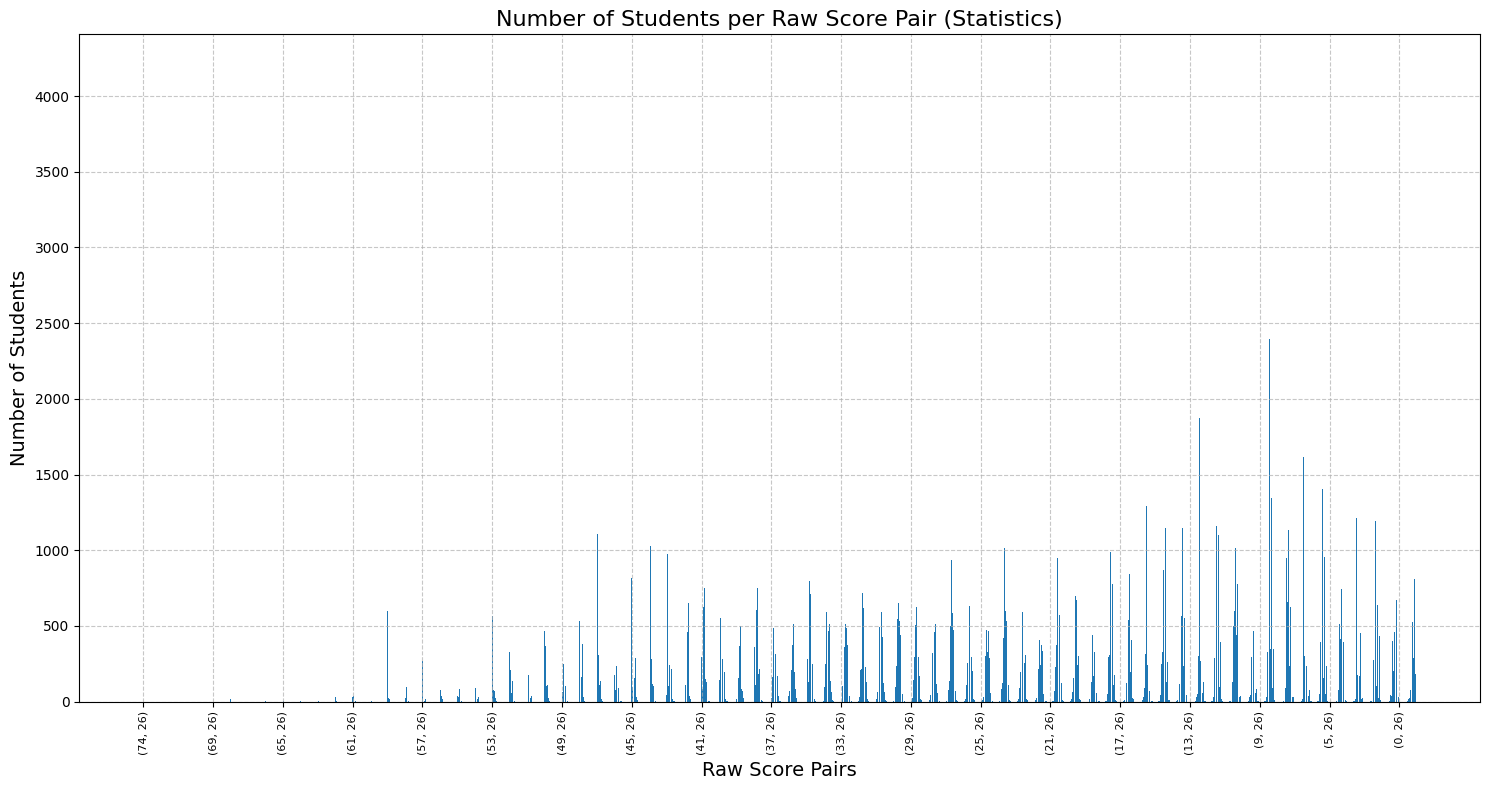

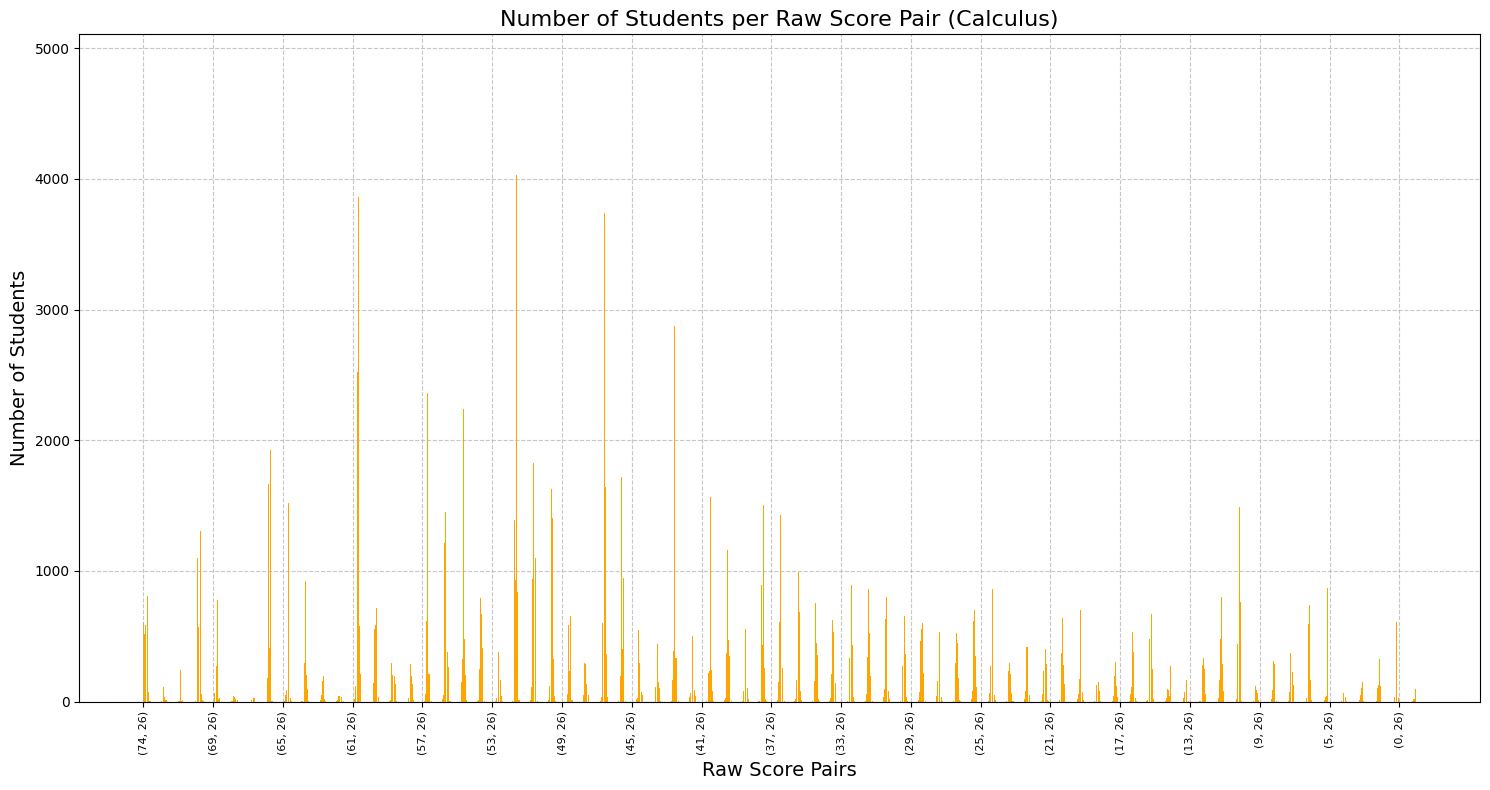

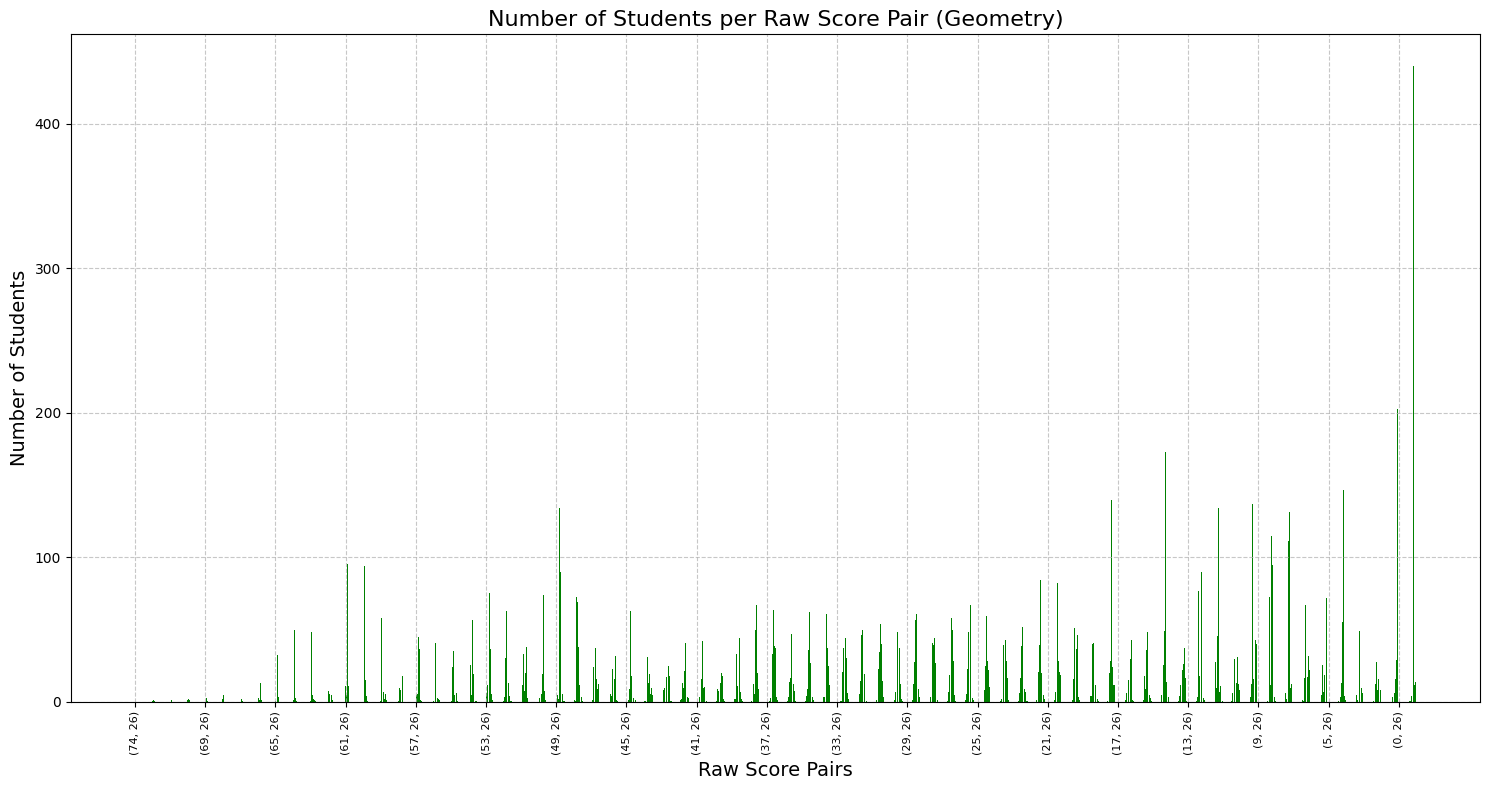

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming z_scores and one_mil are already defined
# Get the raw_score_pairs (same for all datasets)
raw_score_pairs = [raw_score_pair for major, raw_score_pair in list(z_scores.keys())][:1825]
print(len(raw_score_pairs))  # Should print 1825

# Sample Data
one_mil_stat = one_mil[:1825]
one_mil_calc = one_mil[1825:3650]
one_mil_geo = one_mil[3650:5475]

# Convert tuples to strings for labeling
raw_score_pair_labels = [str(pair) for pair in raw_score_pairs]

# Create x positions
x_positions = np.arange(len(raw_score_pairs))

# Set interval for x-tick labels to prevent cluttering
interval = 100  # Adjust this value as needed
tick_positions = x_positions[::interval]
tick_labels = raw_score_pair_labels[::interval]

# Plot for one_mil_stat (Statistics)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_stat, align='center')
plt.title('Number of Students per Raw Score Pair (Statistics)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for one_mil_calc (Calculus)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_calc, align='center', color='orange')
plt.title('Number of Students per Raw Score Pair (Calculus)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for one_mil_geo (Geometry)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_geo, align='center', color='green')
plt.title('Number of Students per Raw Score Pair (Geometry)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 표준 점수별 분산 정도
# corner_sol은 표준점수 별로 하나의 값 빼고 다 0

for (key, value), num in zip(z_scores.items(), one_mil):
    if value == 144:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

print('============================================================================')

for (key, value), num in zip(z_scores.items(), one_mil):
    if value == 137:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

NameError: name 'z_scores' is not defined

In [ ]:
np.set_printoptions(suppress=True, precision=4)

display(np.round(coef[1825:3650])) # 미적분 도수

# 단순 linprog
#display(np.round(corner_sol[1825:3650])) # 미적분 도수

display(np.round(one_mil[1825:3650]))

array([ 612.,   86.,  517.,  607.,    0.,    0.,  959.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,   44.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,  193.,   16.,  325.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0., 1088.,  772.,  278.,
        829., 1245.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,  326.,  991.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

NameError: name 'one_mil' is not defined

In [ ]:
np.set_printoptions(suppress=True, precision=4)

# 단순 linprog
display(np.round(corner_sol[1825:3650])) # 미적분 도수

array([  612.,    86.,   517.,   800.,     0.,   325.,     0.,   772.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,  2091.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,   278.,
           0.,     0.,   634.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,    16.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,  1224.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,  1338.,     0.,     0.,     0.,     0.,     0.,     0.,
      

In [ ]:
# 표준 점수별 분산 정도
# corner_sol은 표준점수 별로 하나의 값 빼고 다 0

ten_mil = pd.read_excel(f"/content/output_10mil.xlsx")[0]

for (key, value), num in zip(z_scores.items(), ten_mil):
    if value == 144:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

print('============================================================================')

for (key, value), num in zip(z_scores.items(), ten_mil):
    if value == 137:
        print(f"Key: {key}, Sum: {key[1][0] + key[1][1]}, z_score: {value}, Coef: {num}")

KeyError: 0

# 시각화

## 일반 선형방정식 해

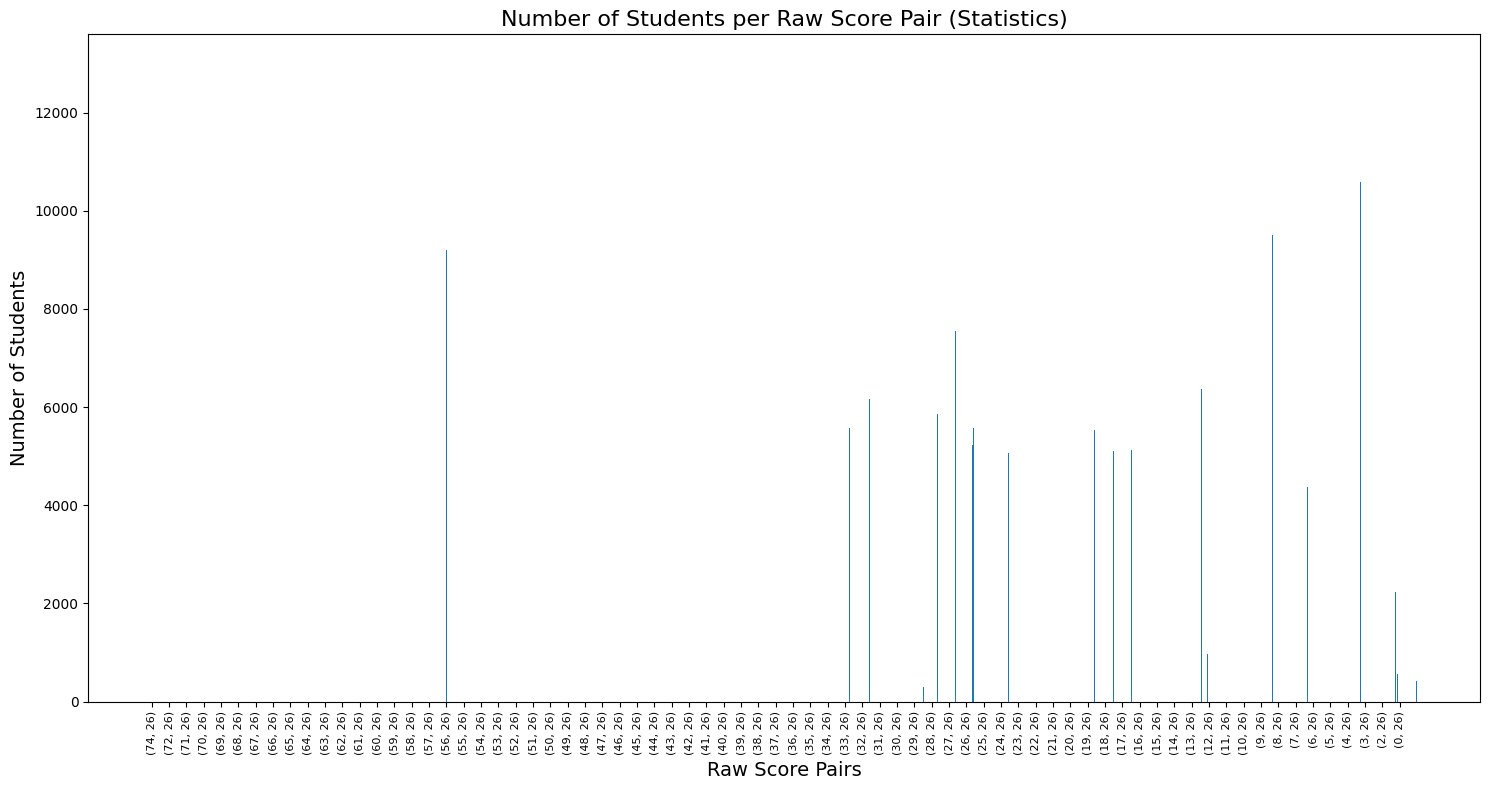

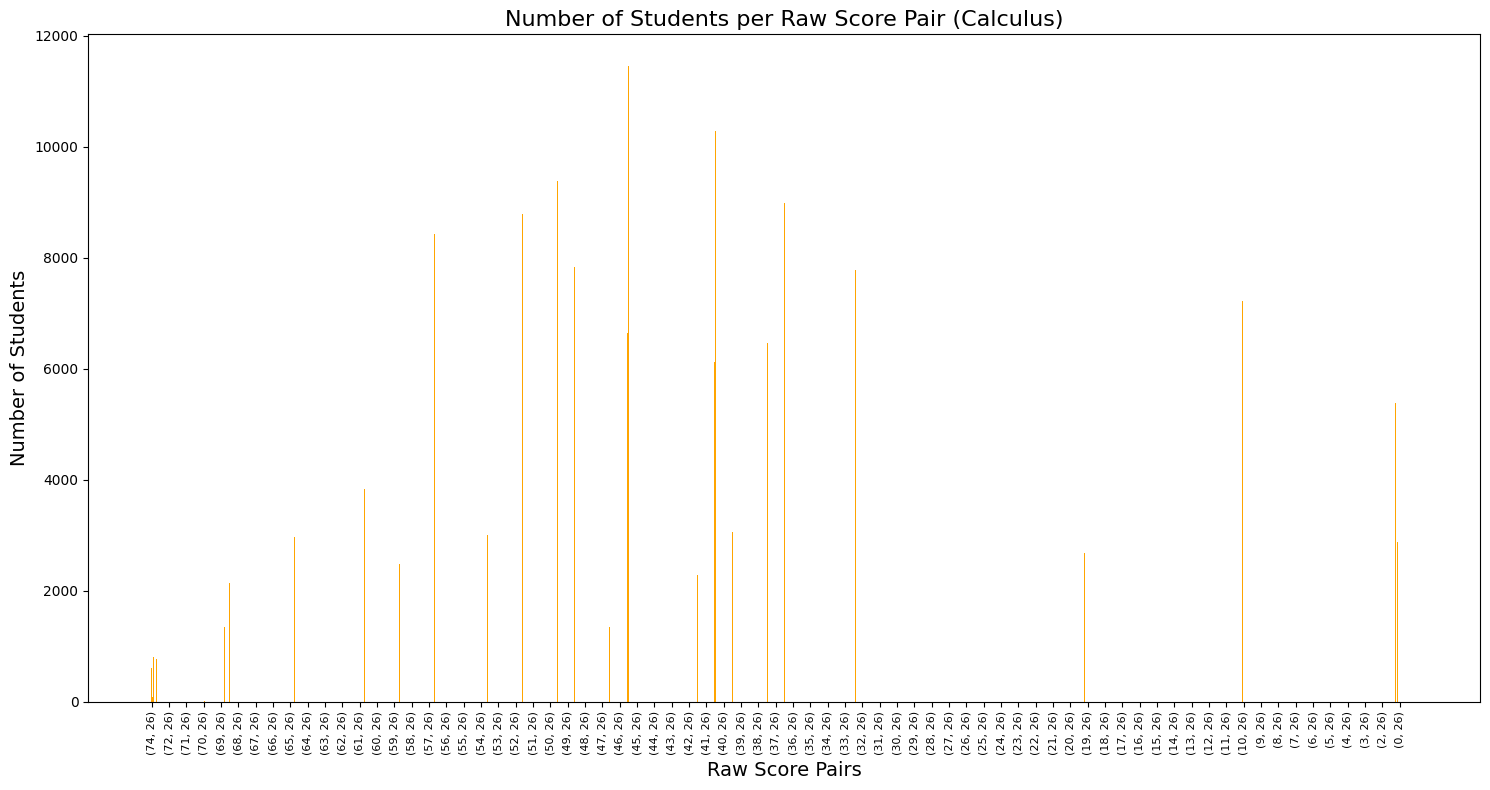

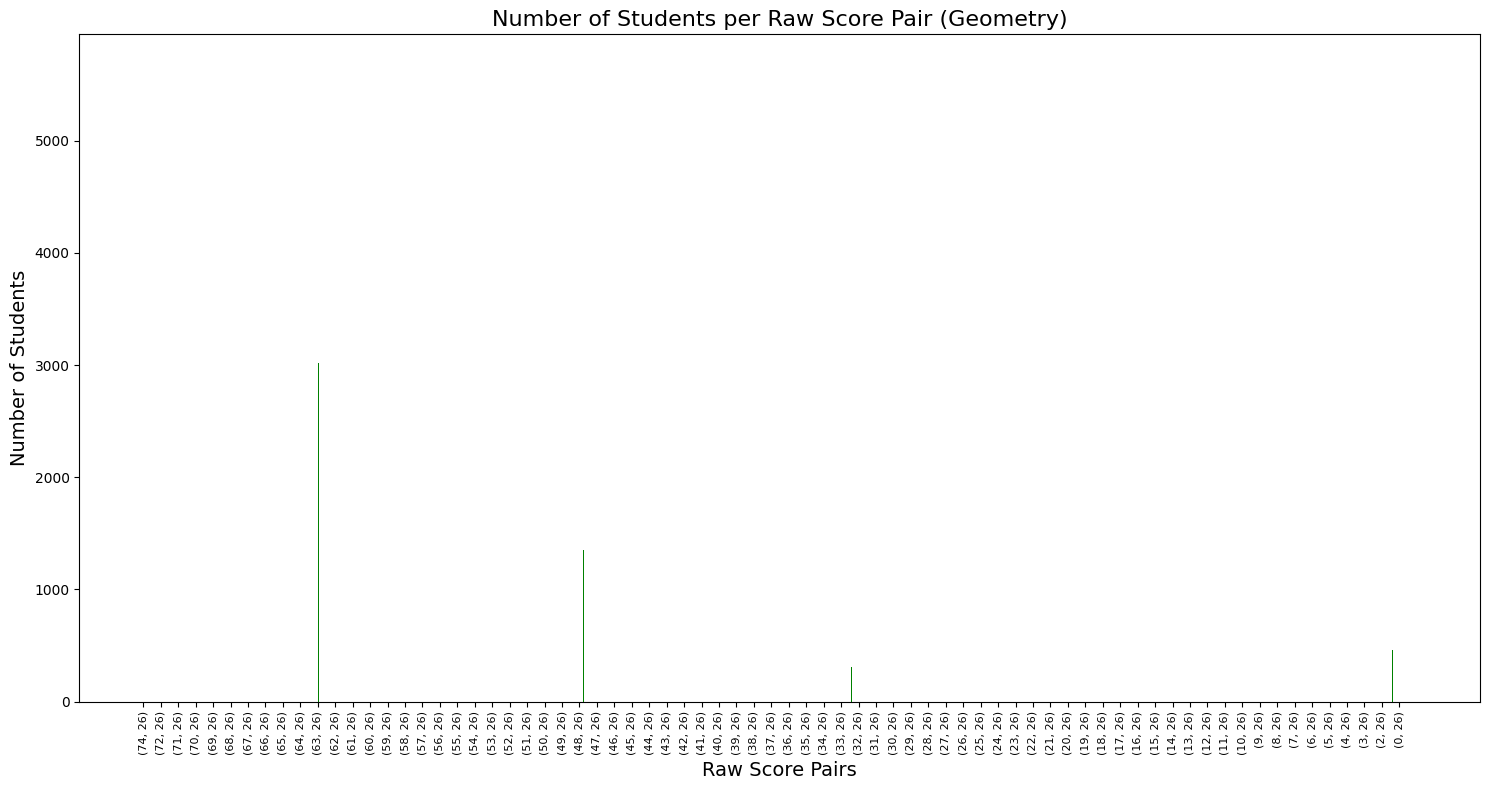

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming z_scores and one_mil are already defined
# Get the raw_score_pairs (same for all datasets)
raw_score_pairs = score_pairs.copy()

# Sample Data
corner_sol_stat = corner_sol[:1825]
corner_sol_calc = corner_sol[1825:3650]
corner_sol_geo = corner_sol[3650:5475]

# Convert tuples to strings for labeling
raw_score_pair_labels = [str(pair) for pair in raw_score_pairs]

# Create x positions
x_positions = np.arange(len(raw_score_pairs))

# Set interval for x-tick labels to prevent cluttering
interval = 25  # Adjust this value as needed
tick_positions = x_positions[::interval]
tick_labels = raw_score_pair_labels[::interval]

# Plot for corner_sol_stat (Statistics)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, corner_sol_stat, align='center')
plt.title('Number of Students per Raw Score Pair (Statistics)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for corner_sol_calc (Calculus)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, corner_sol_calc, align='center', color='orange')
plt.title('Number of Students per Raw Score Pair (Calculus)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for corner_sol_geo (Geometry)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, corner_sol_geo, align='center', color='green')
plt.title('Number of Students per Raw Score Pair (Geometry)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## KL 발산 100만번 최적화

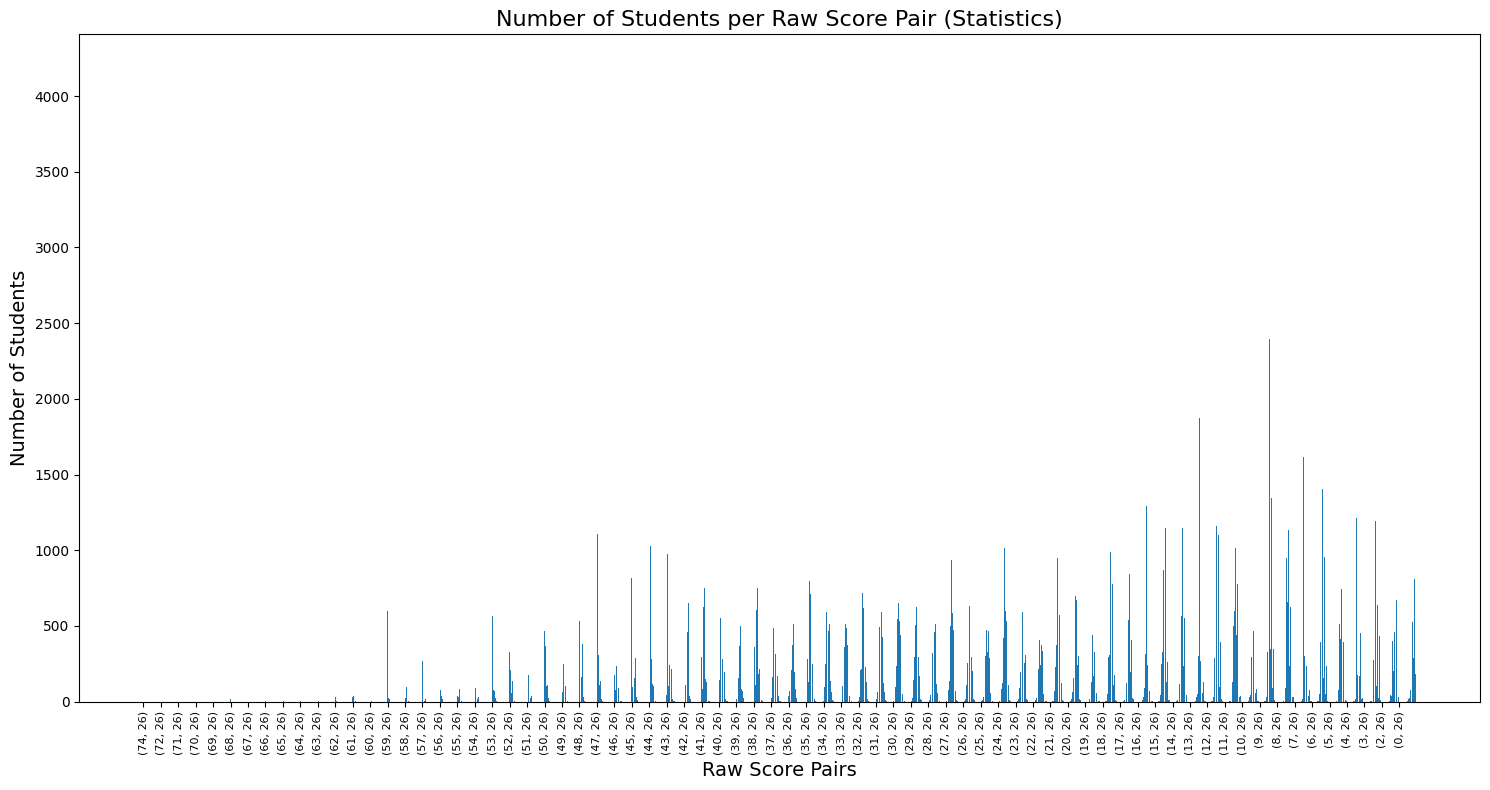

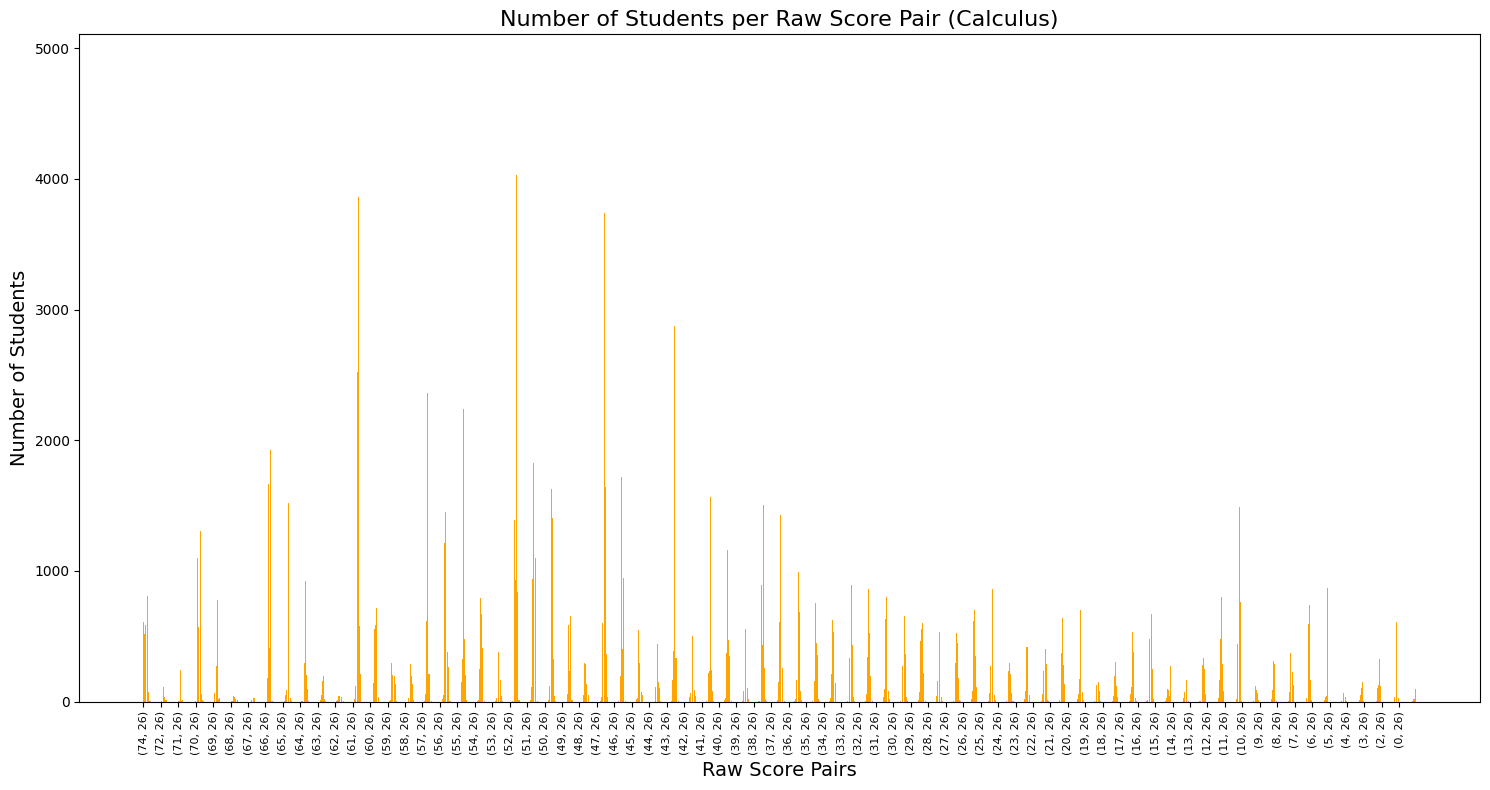

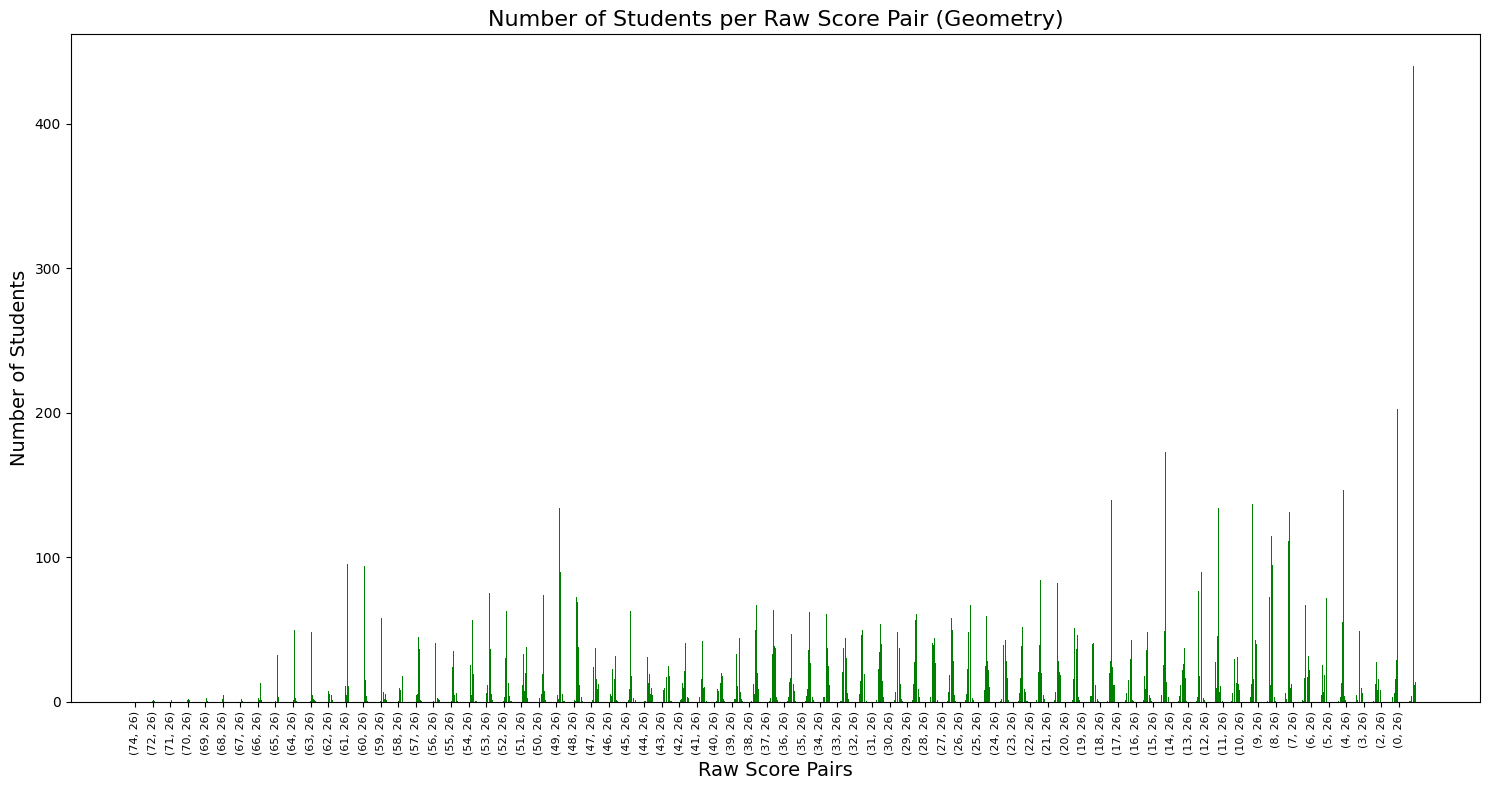

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming z_scores and one_mil are already defined
# Get the raw_score_pairs (same for all datasets)
raw_score_pairs = score_pairs.copy()

# Sample Data
one_mil_stat = one_mil[:1825]
one_mil_calc = one_mil[1825:3650]
one_mil_geo = one_mil[3650:5475]

# Convert tuples to strings for labeling
raw_score_pair_labels = [str(pair) for pair in raw_score_pairs]

# Create x positions
x_positions = np.arange(len(raw_score_pairs))

# Set interval for x-tick labels to prevent cluttering
interval = 25  # Adjust this value as needed
tick_positions = x_positions[::interval]
tick_labels = raw_score_pair_labels[::interval]

# Plot for one_mil_stat (Statistics)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_stat, align='center')
plt.title('Number of Students per Raw Score Pair (Statistics)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for one_mil_calc (Calculus)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_calc, align='center', color='orange')
plt.title('Number of Students per Raw Score Pair (Calculus)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for one_mil_geo (Geometry)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, one_mil_geo, align='center', color='green')
plt.title('Number of Students per Raw Score Pair (Geometry)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 현재 coef

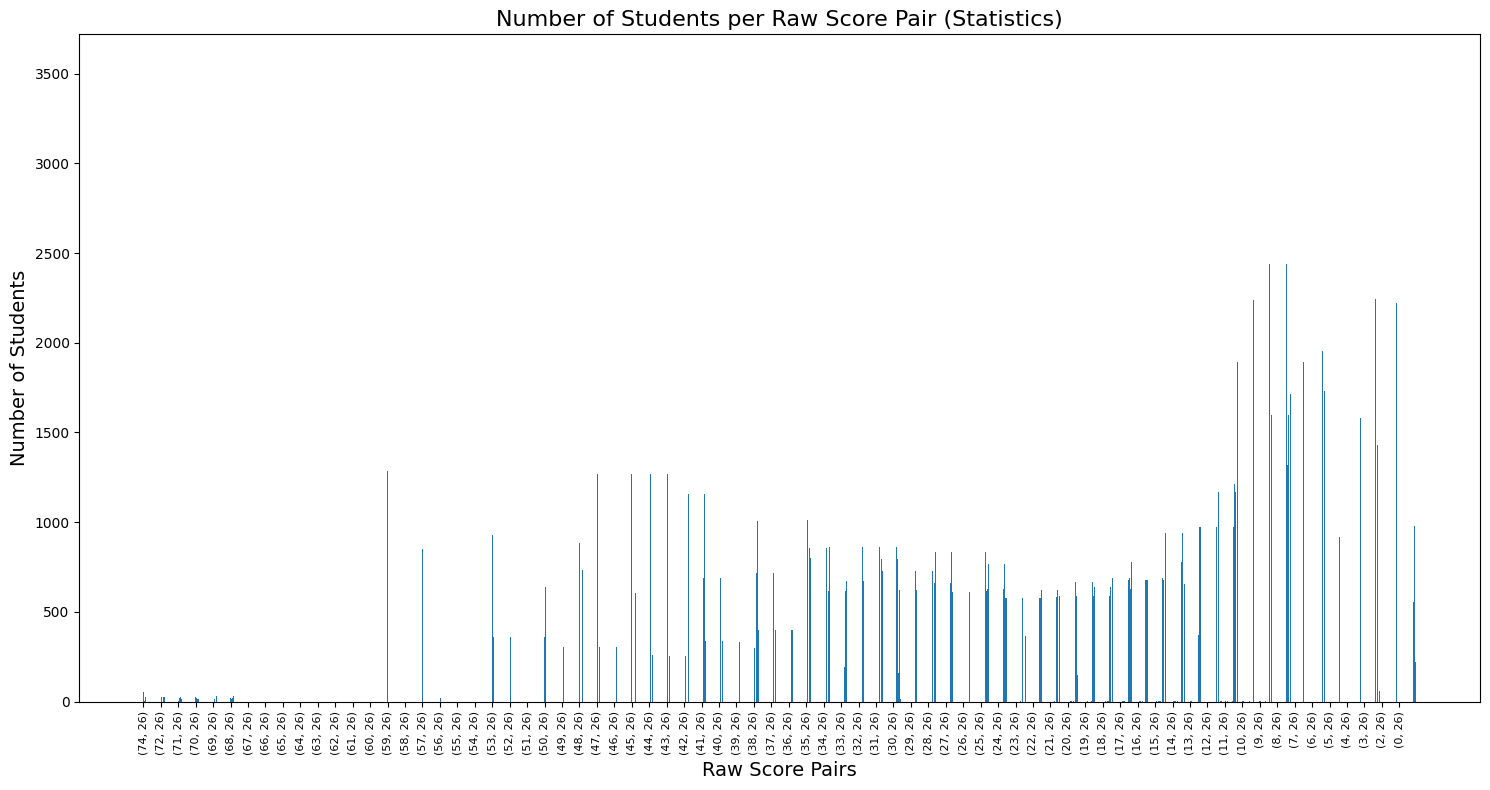

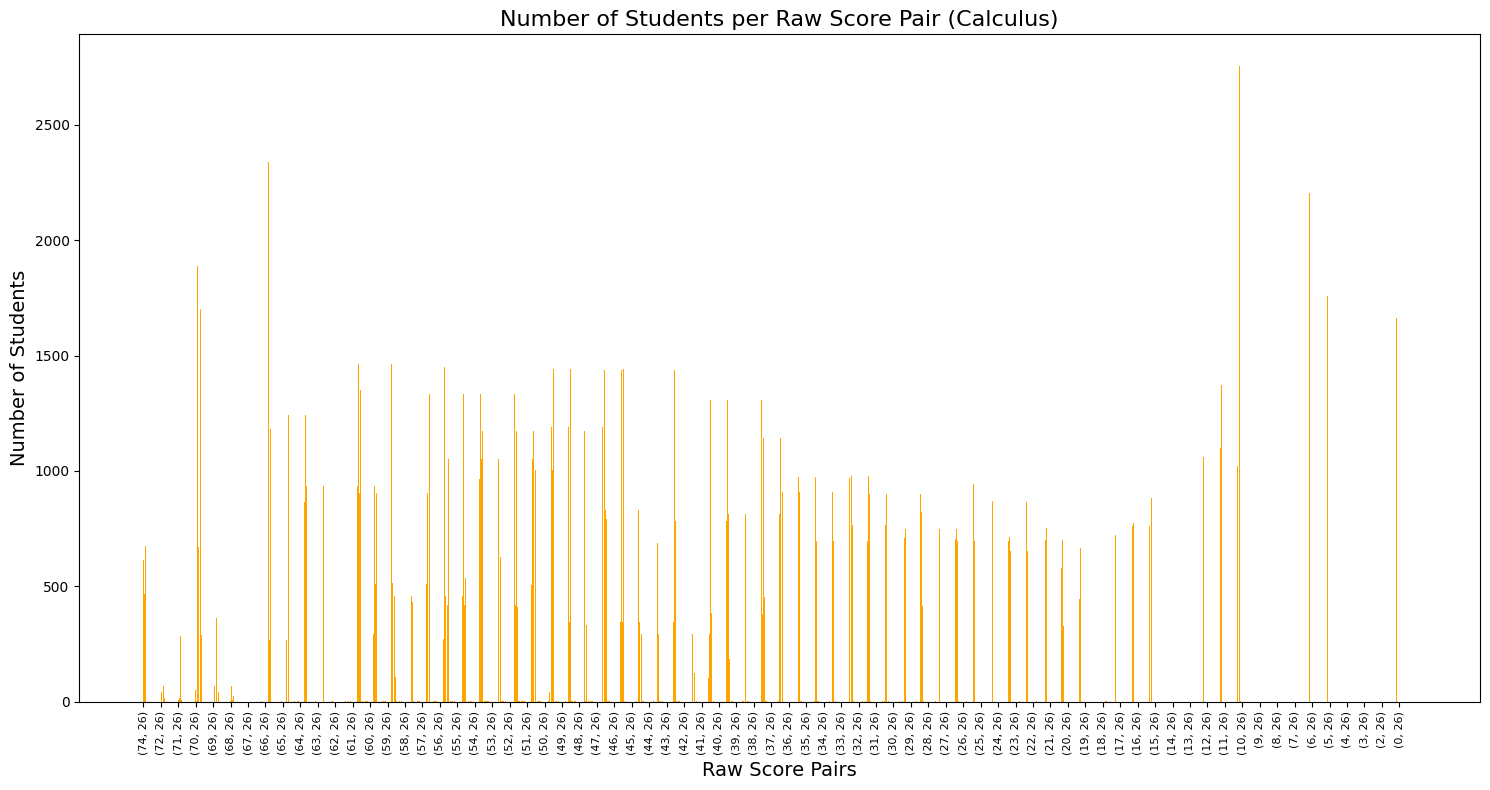

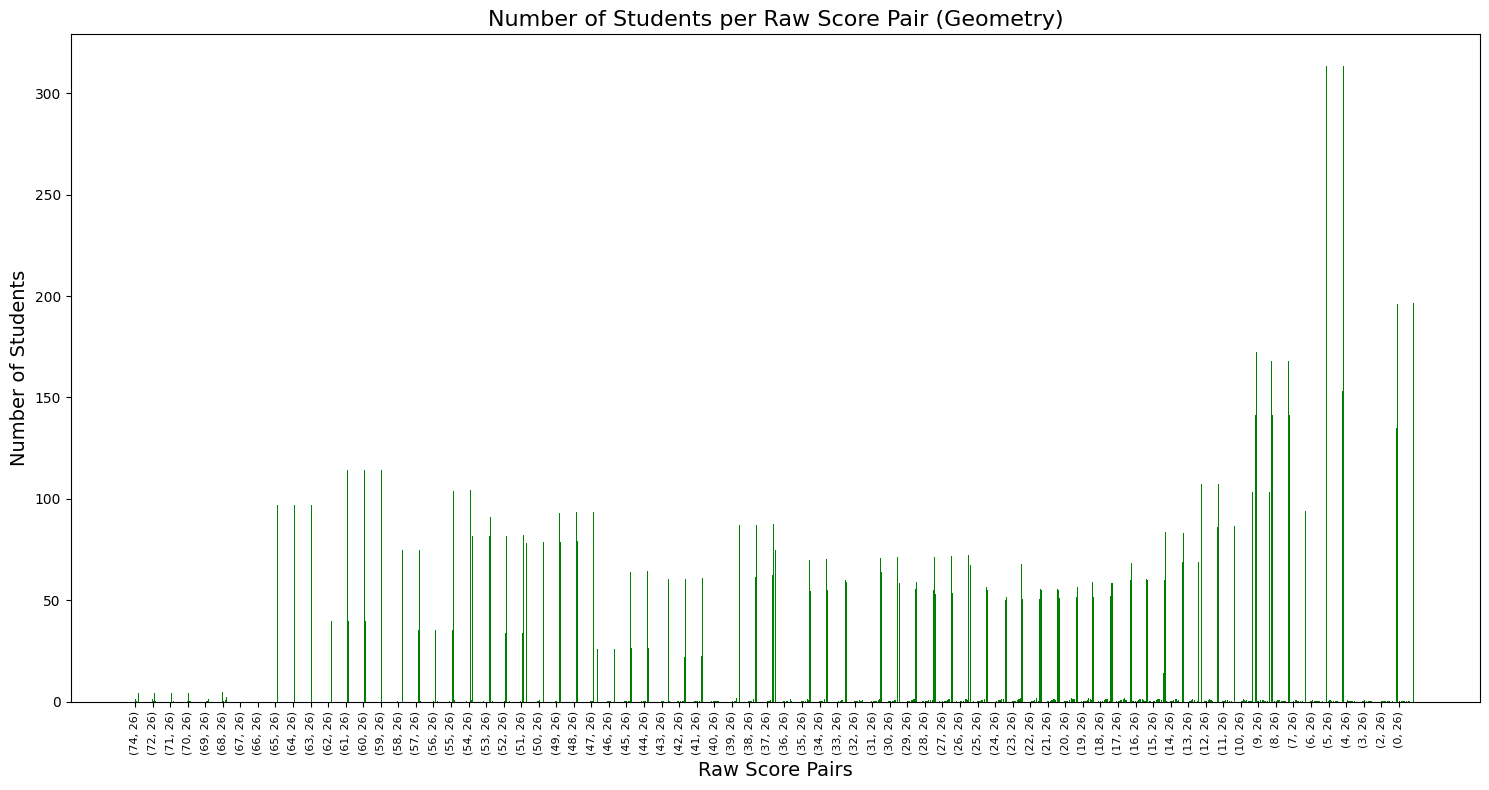

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming z_scores and coef are already defined
# Get the raw_score_pairs (same for all datasets)
raw_score_pairs = score_pairs.copy()

# Sample Data
coef_stat = coef[:1825]
coef_calc = coef[1825:3650]
coef_geo = coef[3650:5475]

# Convert tuples to strings for labeling
raw_score_pair_labels = [str(pair) for pair in raw_score_pairs]

# Create x positions
x_positions = np.arange(len(raw_score_pairs))

# Set interval for x-tick labels to prevent cluttering
interval = 25  # Adjust this value as needed
tick_positions = x_positions[::interval]
tick_labels = raw_score_pair_labels[::interval]

# Plot for coef_stat (Statistics)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, coef_stat, align='center')
plt.title('Number of Students per Raw Score Pair (Statistics)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coef_calc (Calculus)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, coef_calc, align='center', color='orange')
plt.title('Number of Students per Raw Score Pair (Calculus)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coef_geo (Geometry)
plt.figure(figsize=(15, 8))
plt.bar(x_positions, coef_geo, align='center', color='green')
plt.title('Number of Students per Raw Score Pair (Geometry)', fontsize=16)
plt.xlabel('Raw Score Pairs', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(tick_positions, tick_labels, rotation=90, fontsize=8)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 표준점수별 인원

## 1백만 기준

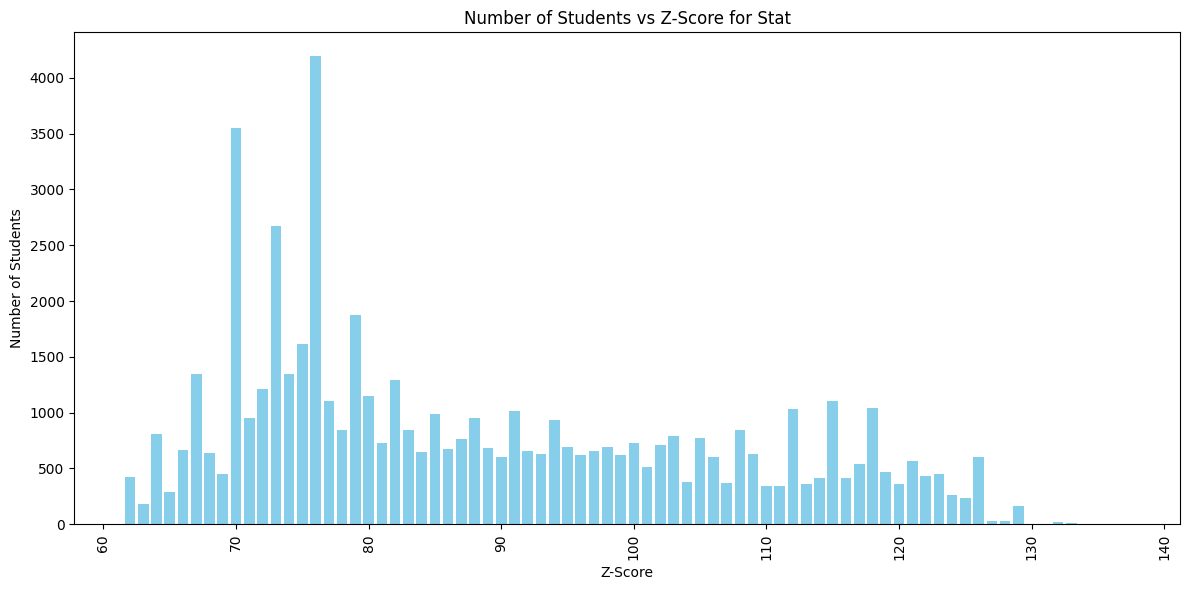

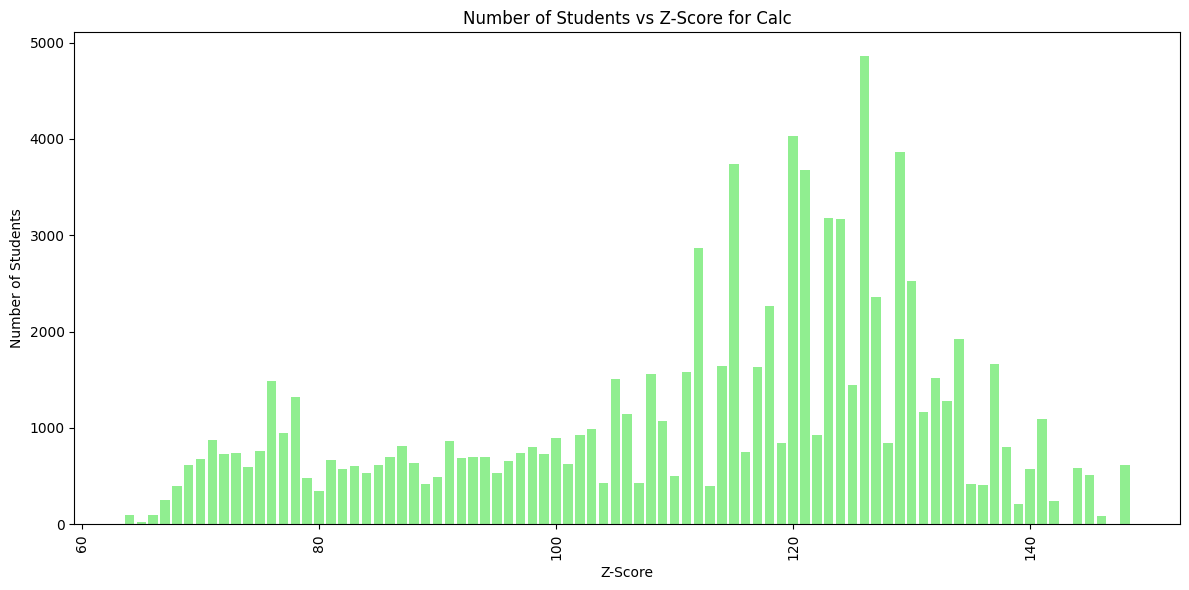

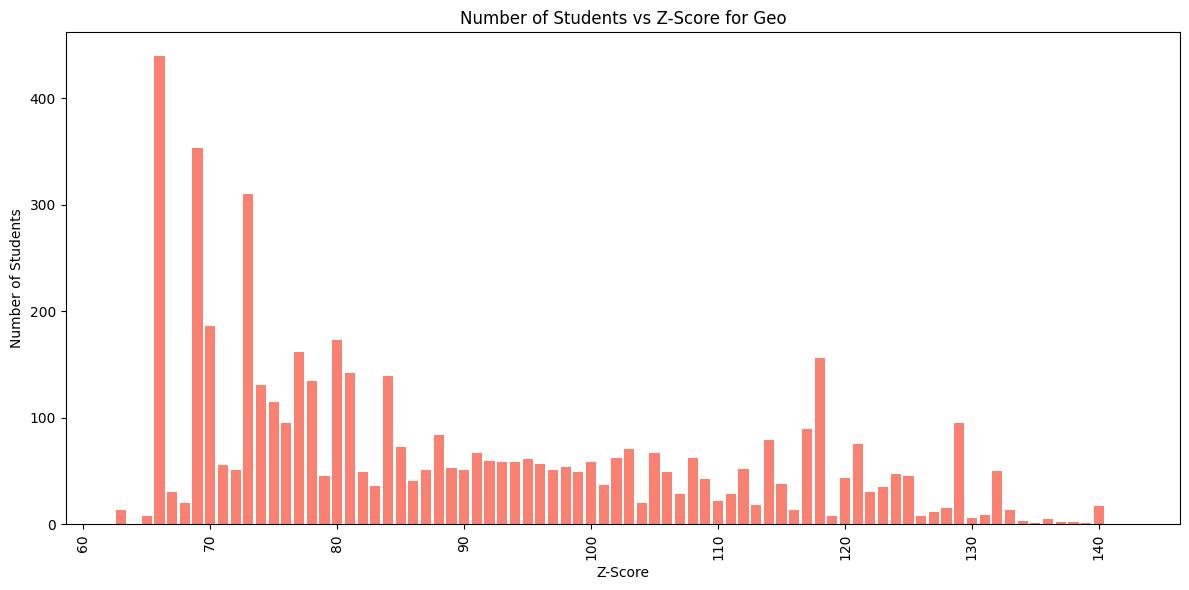

In [ ]:
import matplotlib.pyplot as plt

# Assuming coef and z_scores_values are already defined and are lists of length 5475
# coef = [...]  # Your data here
# z_scores_values = list(z_scores.values())  # Your data here

# Convert z_scores_values to a list if it's not already
z_scores_values = list(z_scores.values())

# Define the indices for each major
stat_indices = slice(0, 1825)
calc_indices = slice(1825, 3650)
geo_indices = slice(3650, 5475)

# Extract data for each major
majors = ['Stat', 'Calc', 'Geo']
indices_list = [stat_indices, calc_indices, geo_indices]
colors = ['skyblue', 'lightgreen', 'salmon']

for major, indices, color in zip(majors, indices_list, colors):
    z_scores_major = z_scores_values[indices]
    one_mil_major = one_mil[indices]

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(z_scores_major, one_mil_major, color=color)

    # Add labels and title
    plt.xlabel('Z-Score')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students vs Z-Score for {major}')

    # Adjust x-axis for better readability if necessary
    plt.xticks(rotation=90)

    # Display the plot
    plt.tight_layout()
    plt.show()


## 현재 coef 기준

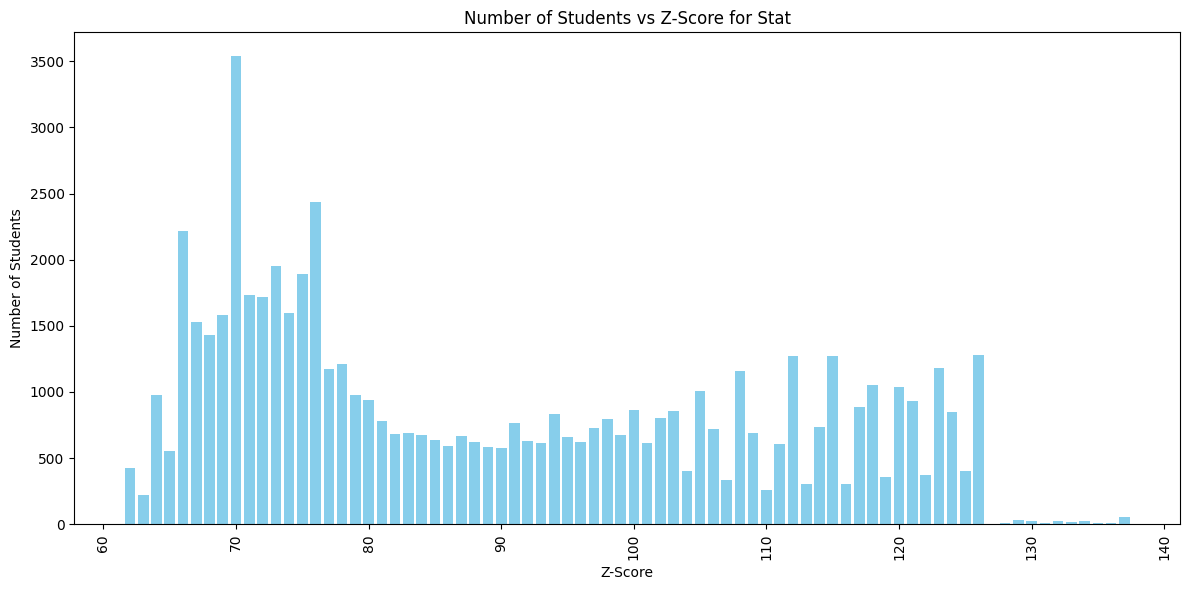

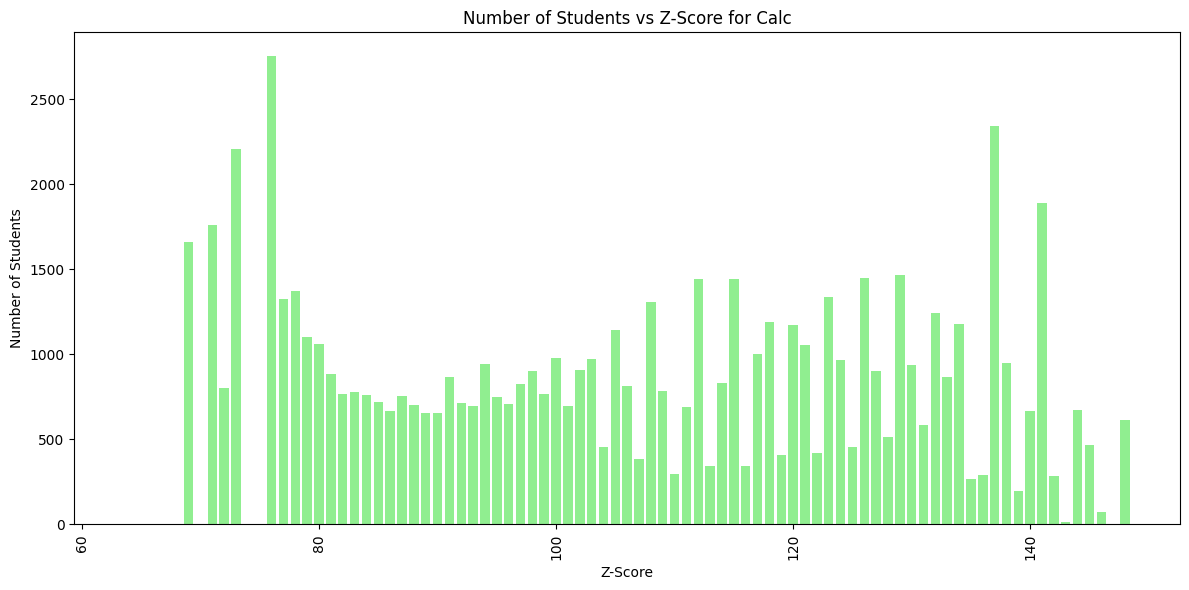

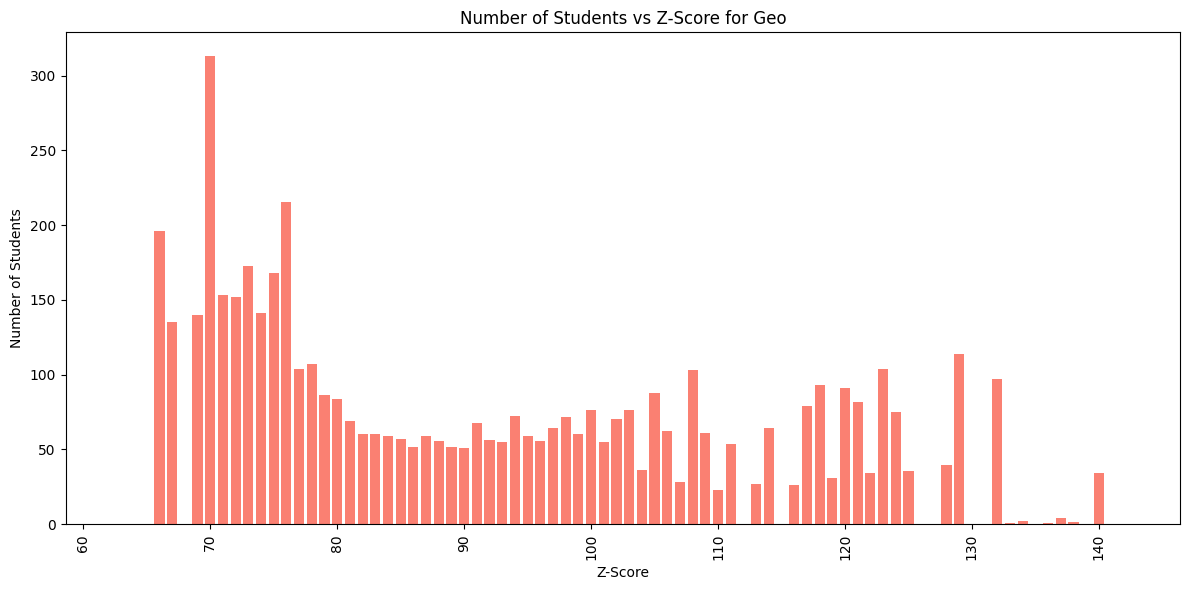

In [ ]:
import matplotlib.pyplot as plt

# Assuming coef and z_scores_values are already defined and are lists of length 5475
# coef = [...]  # Your data here
# z_scores_values = list(z_scores.values())  # Your data here

# Convert z_scores_values to a list if it's not already
z_scores_values = list(z_scores.values())

# Define the indices for each major
stat_indices = slice(0, 1825)
calc_indices = slice(1825, 3650)
geo_indices = slice(3650, 5475)

# Extract data for each major
majors = ['Stat', 'Calc', 'Geo']
indices_list = [stat_indices, calc_indices, geo_indices]
colors = ['skyblue', 'lightgreen', 'salmon']

for major, indices, color in zip(majors, indices_list, colors):
    z_scores_major = z_scores_values[indices]
    coef_major = coef[indices]

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(z_scores_major, coef_major, color=color)

    # Add labels and title
    plt.xlabel('Z-Score')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students vs Z-Score for {major}')

    # Adjust x-axis for better readability if necessary
    plt.xticks(rotation=90)

    # Display the plot
    plt.tight_layout()
    plt.show()


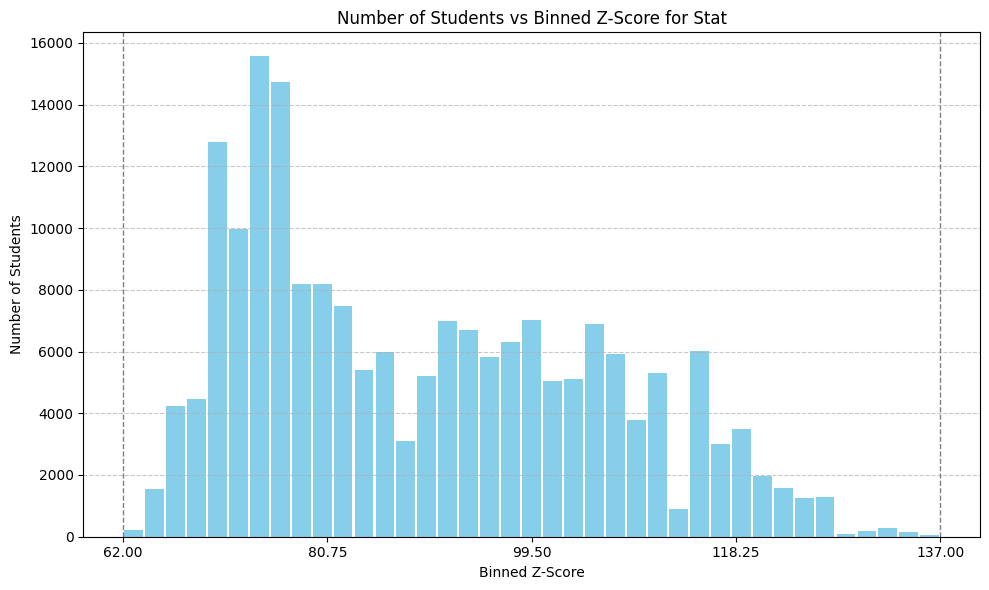

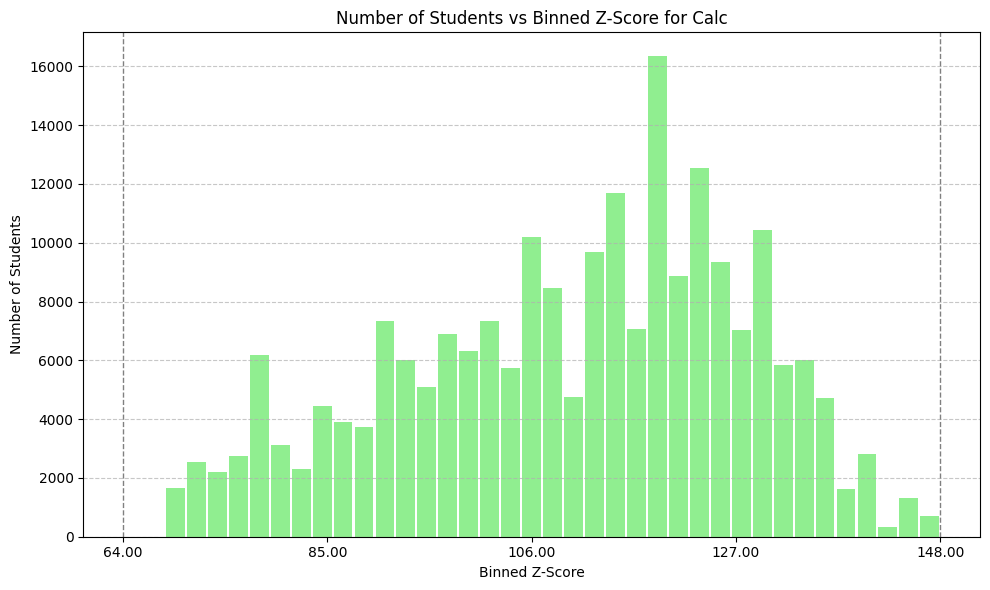

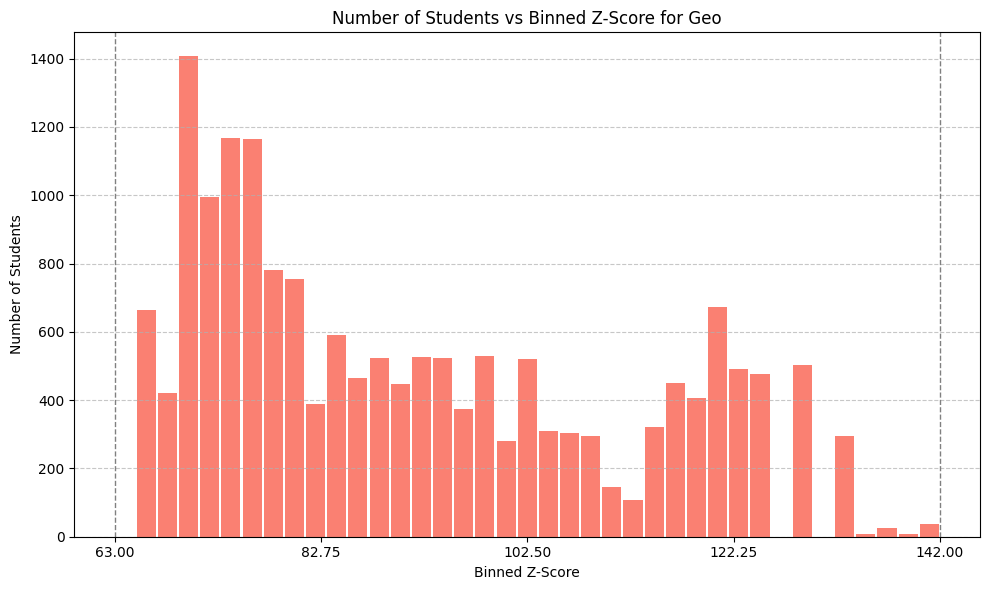

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming coef and z_scores_values are already defined and are lists of length 5475
# coef = [...]  # Your data here
# z_scores_values = list(z_scores.values())  # Your data here

# Convert z_scores_values to a list if it's not already
z_scores_values = list(z_scores.values())

# Define the indices for each major
stat_indices = slice(0, 1825)
calc_indices = slice(1825, 3650)
geo_indices = slice(3650, 5475)

# Extract data for each major
majors = ['Stat', 'Calc', 'Geo']
indices_list = [stat_indices, calc_indices, geo_indices]
colors = ['skyblue', 'lightgreen', 'salmon']

for major, indices, color in zip(majors, indices_list, colors):
    z_scores_major = z_scores_values[indices]
    coef_major = coef[indices]

    # Convert to NumPy arrays for easier manipulation
    z_scores_major = np.array(z_scores_major)
    coef_major = np.array(coef_major)

    # Define bins for z-scores (5 intervals)
    min_z = z_scores_major.min()
    max_z = z_scores_major.max()
    bins = np.linspace(min_z, max_z, 40)  # 5 intervals, 6 bin edges
    bin_indices = np.digitize(z_scores_major, bins, right=True)

    # Sum coef within each bin
    bin_counts = [coef_major[bin_indices == i].sum() for i in range(1, len(bins))]

    # Use the bin centers for x-axis
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, bin_counts, width=(bins[1]-bins[0])*0.9, color=color, align='center')

    # Add labels and title
    plt.xlabel('Binned Z-Score')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students vs Binned Z-Score for {major}')

    # Set x-ticks to include min_z, max_z, and intermediate points
    xticks = np.linspace(min_z, max_z, 5)  # Adjust the number of ticks here
    plt.xticks(xticks, [f"{x:.2f}" for x in xticks])

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Highlight min and max z-scores
    plt.axvline(x=min_z, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x=max_z, color='gray', linestyle='--', linewidth=1)

    # Display the plot
    plt.tight_layout()
    plt.show()
